In [118]:
#Carregar bibliotecas gerais
import pandas as pd
import numpy as np
import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import locale
import warnings
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
!pip install pmdarima
from pmdarima.arima import auto_arima

In [119]:
#Lendo os arquivos
acidente = pd.read_excel(r"E:\CAMILA DRIVE\02.BIG_DATA_PUC\13.TCC\Final\ACID_RJ_FIN.xlsx", squeeze=True)
infracao = pd.read_csv(r"E:\CAMILA DRIVE\02.BIG_DATA_PUC\13.TCC\Final\INFRA_RJ_FIN.csv", sep = ',')

# ##########################################################
#  .................................. BASE ACIDENTES...............................................
#  ##########################################################

In [120]:
import copy
acidente_copy = pd.DataFrame(columns = acidente.columns, data = copy.deepcopy(acidente.values))
acidente1 = acidente_copy.astype({"Data":str})
acidente1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72068 entries, 0 to 72067
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Data            72068 non-null  object
 1   Dia_semana      72068 non-null  object
 2   UF              72068 non-null  object
 3   BR              72068 non-null  object
 4   Causa           72068 non-null  object
 5   Tipo_acidente   72068 non-null  object
 6   Classificacao   72068 non-null  object
 7   Ilesos          72068 non-null  object
 8   Feridos_leves   72068 non-null  object
 9   Feridos_graves  72068 non-null  object
 10  Obitos          72068 non-null  object
 11  Hora            72068 non-null  object
 12  Periodo         72068 non-null  object
 13  ano             72068 non-null  object
 14  mes_ano         72068 non-null  object
 15  Mes             72068 non-null  object
dtypes: object(16)
memory usage: 8.8+ MB


In [121]:
# Verificando
acidente1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72068 entries, 0 to 72067
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Data            72068 non-null  object
 1   Dia_semana      72068 non-null  object
 2   UF              72068 non-null  object
 3   BR              72068 non-null  object
 4   Causa           72068 non-null  object
 5   Tipo_acidente   72068 non-null  object
 6   Classificacao   72068 non-null  object
 7   Ilesos          72068 non-null  object
 8   Feridos_leves   72068 non-null  object
 9   Feridos_graves  72068 non-null  object
 10  Obitos          72068 non-null  object
 11  Hora            72068 non-null  object
 12  Periodo         72068 non-null  object
 13  ano             72068 non-null  object
 14  mes_ano         72068 non-null  object
 15  Mes             72068 non-null  object
dtypes: object(16)
memory usage: 8.8+ MB


In [122]:
acidente1.head(1)

,Data,Dia_semana,UF,BR,Causa,Tipo_acidente,Classificacao,Ilesos,Feridos_leves,Feridos_graves,Obitos,Hora,Periodo,ano,mes_ano,Mes
0,2017-01-01,domingo,RJ,116,Falta de Atenção à Condução,Colisão com objeto estático,Sem Vítimas,1,0,0,0,4,Madrugada,2017,2017-01,Janeiro


In [123]:
acidente1.set_index('mes_ano',inplace = True)
acidente1.head()

,Data,Dia_semana,UF,BR,Causa,Tipo_acidente,Classificacao,Ilesos,Feridos_leves,Feridos_graves,Obitos,Hora,Periodo,ano,Mes
mes_ano,,,,,,,,,,,,,,,
2017-01,2017-01-01,domingo,RJ,116,Falta de Atenção à Condução,Colisão com objeto estático,Sem Vítimas,1,0,0,0,4,Madrugada,2017,Janeiro
2017-01,2017-01-01,domingo,RJ,101,Condutor Dormindo,Saída de leito carroçável,Sem Vítimas,1,0,0,0,4,Madrugada,2017,Janeiro
2017-01,2017-01-01,domingo,RJ,101,Condutor Dormindo,Tombamento,Sem Vítimas,1,0,0,0,4,Madrugada,2017,Janeiro
2017-01,2017-01-01,domingo,RJ,356,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,1,0,0,0,0,Madrugada,2017,Janeiro
2017-01,2017-01-01,domingo,RJ,356,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,0,1,0,0,0,Madrugada,2017,Janeiro


## Criando as séries - Acidentes

In [124]:
#Criando a serie de Ocorrências por ano
acid_porano = acidente1.groupby('ano').size()
acid_porano.head()

ano
2017    18107
2018    16634
2019    17943
2020    19384
dtype: int64

In [125]:
#Criando a serie de Ocorrências por ano
acid_pormes = acidente1.groupby('Mes').size().sort_values(ascending=False)
acid_pormes

Mes
Dezembro     7590
Novembro     6883
Janeiro      6457
Setembro     6416
Outubro      6209
Agosto       5980
Julho        5963
Fevereiro    5547
Março        5479
Maio         5322
Junho        5141
Abril        5081
dtype: int64

In [126]:
#Criando a serie de Ocorrências por mes_ano
acid_mesano = acidente1.groupby('mes_ano').size()
acid_mesano.head()

mes_ano
2017-01    1460
2017-02    1410
2017-03    1356
2017-04    1634
2017-05    1600
dtype: int64

In [127]:
acid_ano_periodo = acidente1.groupby(['ano','Periodo']).agg({'Periodo': 'count'}).unstack()
acid_ano_periodo.head()

Periodo                  
Periodo Madrugada Manhã Noite Tarde
ano                                
2017         2535  4943  5144  5485
2018         2159  4326  4997  5152
2019         2733  5266  4656  5288
2020         2454  5033  5534  6363

In [128]:
acid_ano_mes = acidente1.groupby(['ano','Mes']).agg({'Mes': 'count'}).unstack()
acid_ano_mes.head()

Mes                                                                     \
Mes  Abril Agosto Dezembro Fevereiro Janeiro Julho Junho  Maio Março Novembro   
ano                                                                             
2017  1634   1385     1721      1410    1460  1669  1439  1600  1356     1569   
2018  1110   1576     1796      1095    1602  1462  1247  1246  1588     1414   
2019  1447   1369     1731      1234    1609  1363  1311  1297  1364     1824   
2020   890   1650     2342      1808    1786  1469  1144  1179  1171     2076   

                       
Mes  Outubro Setembro  
ano                    
2017    1525     1339  
2018    1471     1027  
2019    1540     1854  
2020    1673     2196

In [129]:
acid_mesporano = acidente1.groupby(['Mes','ano']).agg({'ano': 'count'}).unstack()
acid_mesporano

ano                  
ano        2017  2018  2019  2020
Mes                              
Abril      1634  1110  1447   890
Agosto     1385  1576  1369  1650
Dezembro   1721  1796  1731  2342
Fevereiro  1410  1095  1234  1808
Janeiro    1460  1602  1609  1786
Julho      1669  1462  1363  1469
Junho      1439  1247  1311  1144
Maio       1600  1246  1297  1179
Março      1356  1588  1364  1171
Novembro   1569  1414  1824  2076
Outubro    1525  1471  1540  1673
Setembro   1339  1027  1854  2196

In [130]:
acid_ano_br = acidente1.groupby(['ano','BR']).agg({'BR': 'count'}).unstack()
acid_ano_br.head()

BR                                                                
BR       40      101     116   354    356     393    465   485     493   495
ano                                                                         
2017  3065.0  6197.0  6422.0  33.0  318.0  1382.0  296.0   3.0   342.0  49.0
2018  2459.0  6038.0  5431.0  50.0  268.0  1571.0  226.0   NaN   546.0  45.0
2019  3183.0  6124.0  5346.0  53.0  521.0  1256.0  368.0   NaN  1039.0  53.0
2020  3951.0  7640.0  4852.0  55.0  517.0  1008.0  397.0  19.0   887.0  58.0

## Plotando os gráficos  - Acidentes

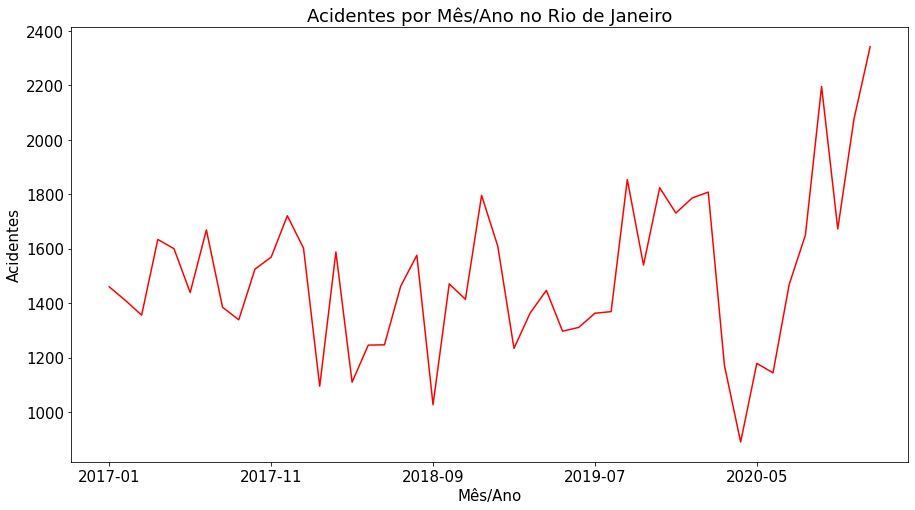

In [131]:
#Plotando gráfico "Acidentes por Mês/Ano no Rio de Janeiro'
ax = acid_mesano.plot(kind='line', color = 'red', title='Acidentes por Mês/Ano no Rio de Janeiro', figsize=(15,8))
ax.set_ylabel('Acidentes')
ax.set_xlabel('Mês/Ano')
plt.show()

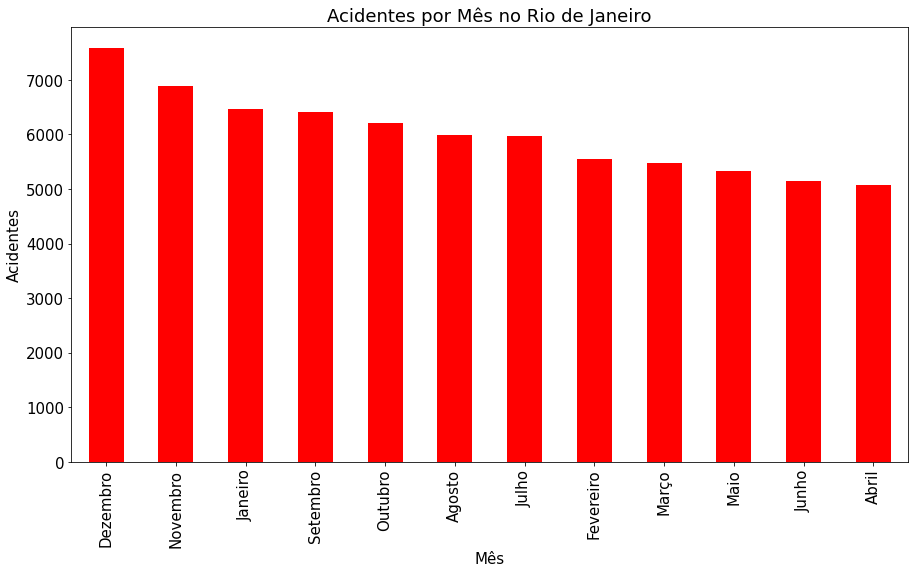

In [132]:
#Plotando gráfico "Acidentes por Mês no Rio de Janeiro'
ax = acid_pormes.plot(kind='bar', color = 'red', title='Acidentes por Mês no Rio de Janeiro', figsize=(15,8))
ax.set_ylabel('Acidentes')
ax.set_xlabel('Mês')
plt.show()

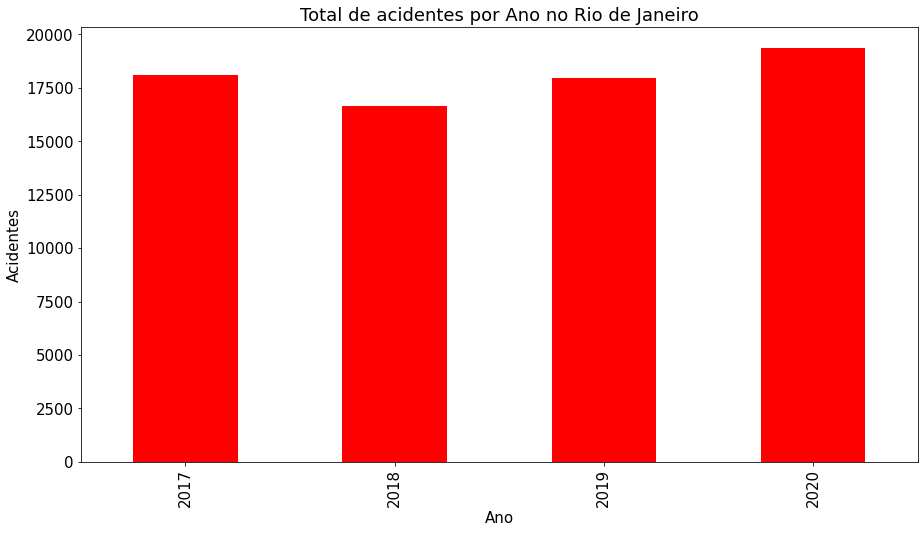

In [133]:
# Plotando gráfico "Acidentes por Ano no Rio de Janeiro'
ax = acid_porano.plot(kind='bar', color = 'red', title='Total de acidentes por Ano no Rio de Janeiro', figsize=(15,8))
ax.set_ylabel('Acidentes')
ax.set_xlabel('Ano')
plt.show()

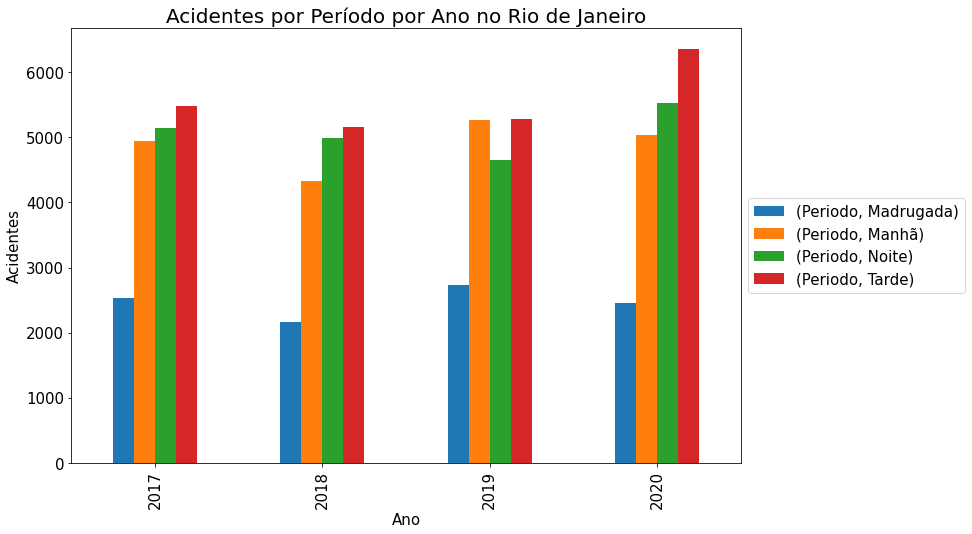

In [134]:
# Plotando gráfico "Acidentes por Período por Ano no Rio de Janeiro'
ax = acid_ano_periodo.plot(kind='bar', figsize=(15,8))
ax.set_ylabel('Acidentes')
ax.set_xlabel('Ano')
ax.set_title('Acidentes por Período por Ano no Rio de Janeiro', fontsize = 20)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams.update({'font.size': 15})
plt.show()

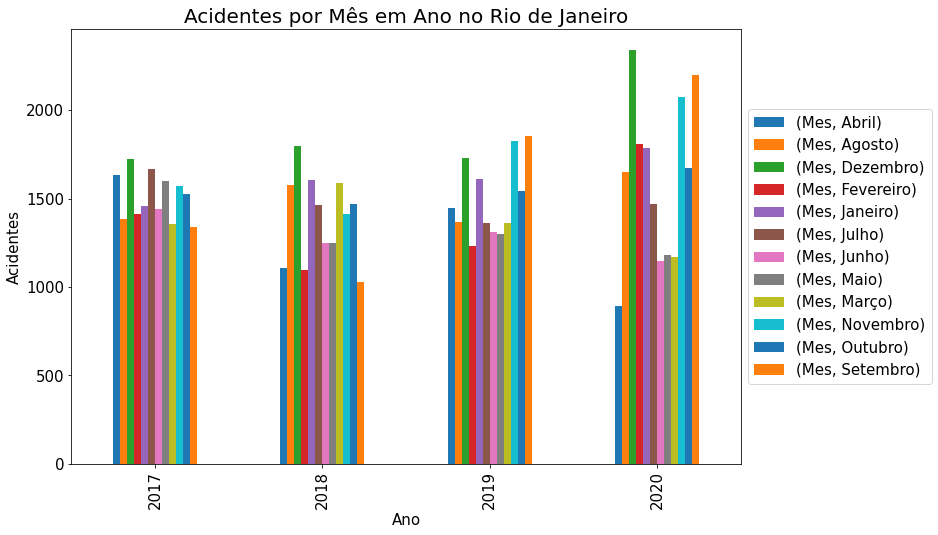

In [135]:
# Plotando gráfico "Acidentes por Ano por período no Rio de Janeiro'
ax = acid_ano_mes.plot(kind='bar', title='Acidentes por MÊs em Ano  por Período no Rio de Janeiro', figsize=(15,8))
ax.set_ylabel('Acidentes')
ax.set_xlabel('Ano')
ax.set_title('Acidentes por Mês em Ano no Rio de Janeiro', fontsize = 20)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams.update({'font.size': 15})
plt.show()

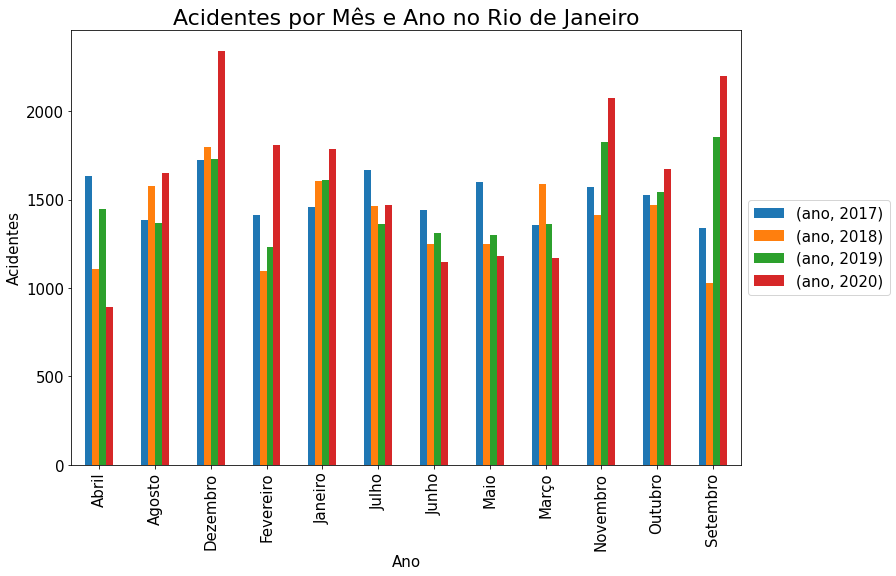

In [136]:
# Plotando gráfico "Acidentes por Mês e por Ano no Rio de Janeiro'
ax = acid_mesporano.plot(kind='bar', title='Acidentes por Mês e Ano no Rio de Janeiro', figsize=(15,8))

ax.set_ylabel('Acidentes', fontsize = 15)
ax.set_xlabel('Ano', fontsize = 15)
ax.set_title('Acidentes por Mês e Ano no Rio de Janeiro', fontsize=22)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams.update({'font.size': 15})

plt.show()

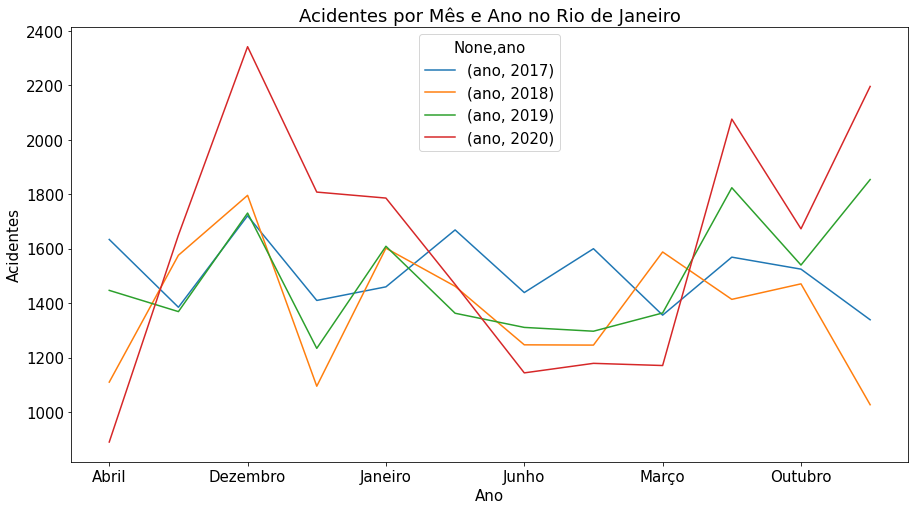

In [137]:
# Plotando gráfico "Acidentes por Mês e por Ano no Rio de Janeiro' - linha
ax = acid_mesporano.plot(kind='line', title='Acidentes por Mês e Ano no Rio de Janeiro', figsize=(15,8))
ax.set_ylabel('Acidentes')
ax.set_xlabel('Ano')
plt.show()

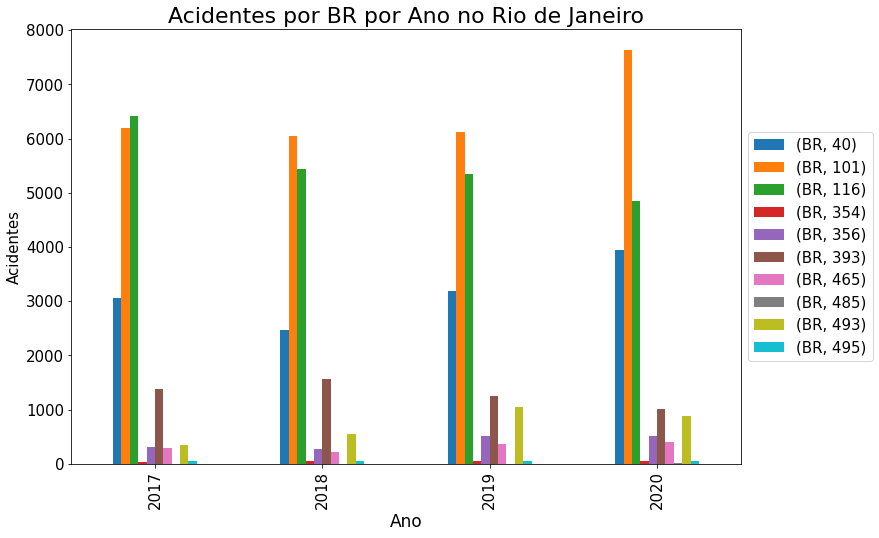

In [138]:
# Plotando gráfico "Acidentes por BR por Ano no Rio de Janeiro'
ax = acid_ano_br.plot(kind='bar', figsize=(15,8))
ax.set_title('Acidentes por BR por Ano no Rio de Janeiro', fontsize=22)
ax.set_ylabel('Acidentes', fontsize=15)
ax.set_xlabel('Ano', fontsize=17)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams.update({'font.size': 15})
plt.show()

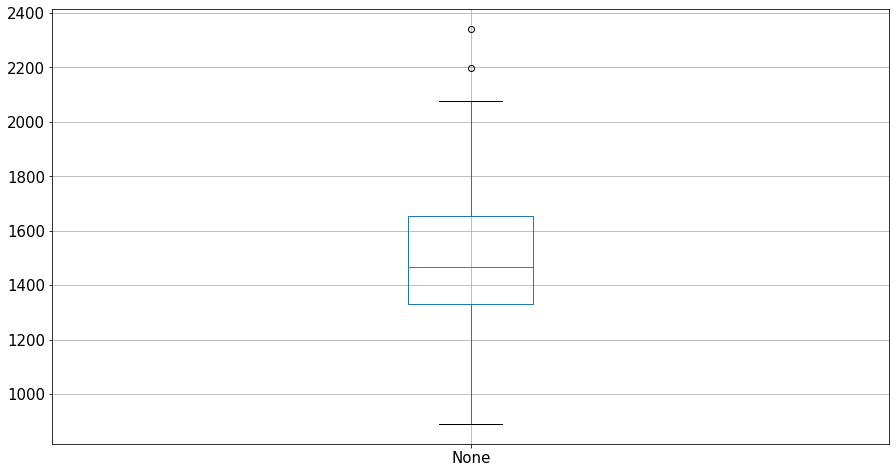

In [139]:
# Plotando gráfico boxplot com os quartis, outliers, valores mínimos e máximos
acid_mesano.plot.box(figsize=(15,8), grid = True)
plt.rcParams.update({'font.size': 15})

## Dados estatísticos das Séries - Acidentes

In [140]:
# Análise estatística dos acidentes por Mês-ano
acid_mesano.describe()

count      48.000000
mean     1501.416667
std       289.567898
min       890.000000
25%      1332.000000
50%      1465.500000
75%      1654.750000
max      2342.000000
dtype: float64

In [141]:
# Análise estatística dos acidentes por ano
acid_porano.describe()

count        4.000000
mean     18017.000000
std       1124.715371
min      16634.000000
25%      17615.750000
50%      18025.000000
75%      18426.250000
max      19384.000000
dtype: float64

## Retirando Outliers - Acidentes

In [142]:
# Analisando MÊs-Ano
#Determinando os qs
q1= 1332
q2 = 1465.5
q3= 1654.75
iqr = (q3-q1)
fator = 1.5
lowpass = q1-(iqr*fator)
highpass = q3+(iqr*fator)

def removeoutlier(value):
        if value > highpass: 
            return -1
        elif value < lowpass:
            return -1
        else:
            return value

In [143]:
acidente2 = acid_mesano.apply(lambda value: removeoutlier(value))

In [144]:
acidente2.sort_values(ascending=True)[:3]

mes_ano
2020-12     -1
2020-09     -1
2020-04    890
dtype: int64

In [145]:
acidente_ok = acidente2.drop(labels = ['2020-12', '2020-09'])
acidente_ok.sort_values(ascending=True)[:5]

mes_ano
2020-04     890
2018-09    1027
2018-02    1095
2018-04    1110
2020-06    1144
dtype: int64

<AxesSubplot:>

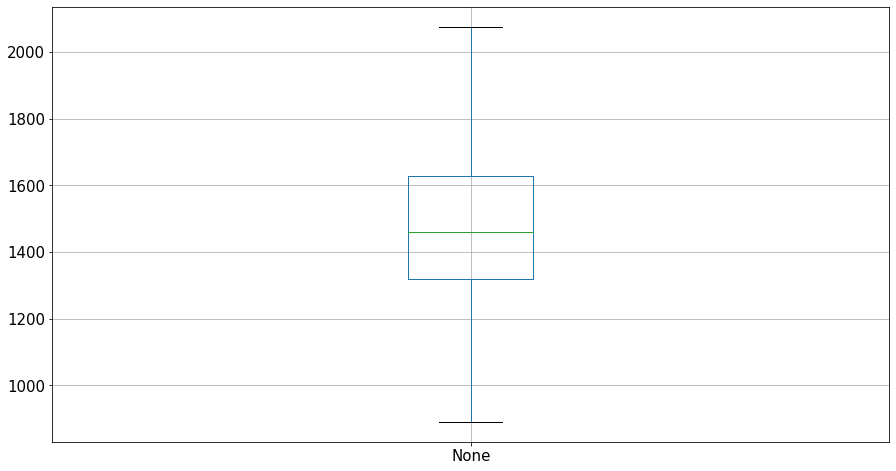

In [146]:
# Plotando gráfico boxplot com os quartis, outliers, valores mínimos e máximos
acidente_ok.plot.box(figsize=(15,8), grid = True)

# ---------------------------------------------------------------------------------------------------------------
# Iniciar preparação para o ARIMA  - Acidentes
# ---------------------------------------------------------------------------------------------------------------

## Dividindo as bases

Total são 46 meses (pois retiramos 2 de 2020)

BASE DE TREINO -> Então ficam 80% de 46 = 36.8 que vamos aproximar para 37

BASE DE TESTE -> Os últimos 9 meses

In [147]:
import copy
prebases = acidente_ok.copy(deep=True)
type(prebases)

pandas.core.series.Series

In [148]:
# Criando e visualizando base treino
acid_treino = prebases.iloc[0:37]
acid_treino

mes_ano
2017-01    1460
2017-02    1410
2017-03    1356
2017-04    1634
2017-05    1600
2017-06    1439
2017-07    1669
2017-08    1385
2017-09    1339
2017-10    1525
2017-11    1569
2017-12    1721
2018-01    1602
2018-02    1095
2018-03    1588
2018-04    1110
2018-05    1246
2018-06    1247
2018-07    1462
2018-08    1576
2018-09    1027
2018-10    1471
2018-11    1414
2018-12    1796
2019-01    1609
2019-02    1234
2019-03    1364
2019-04    1447
2019-05    1297
2019-06    1311
2019-07    1363
2019-08    1369
2019-09    1854
2019-10    1540
2019-11    1824
2019-12    1731
2020-01    1786
dtype: int64

In [149]:
type(acid_treino)

pandas.core.series.Series

In [150]:
acid_treino.shape

(37,)

In [151]:
# Criando e visualizando base teste
acid_teste = prebases.iloc[37:47]
acid_teste

mes_ano
2020-02    1808
2020-03    1171
2020-04     890
2020-05    1179
2020-06    1144
2020-07    1469
2020-08    1650
2020-10    1673
2020-11    2076
dtype: int64

In [152]:
type(acid_teste)

pandas.core.series.Series

In [153]:
acid_teste.shape

(9,)

## Processo de escolha de Parâmetros - Acidentes

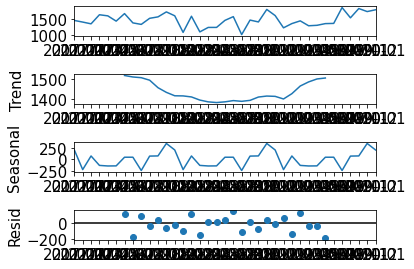

In [154]:
# Primeiro vamos decompor a amostra para entender tendência, sazonalidade e resíduo
decomposicao = seasonal_decompose(acid_treino, period=12)
imagem = decomposicao.plot()

Text(0, 0.5, 'Sazonalidade')

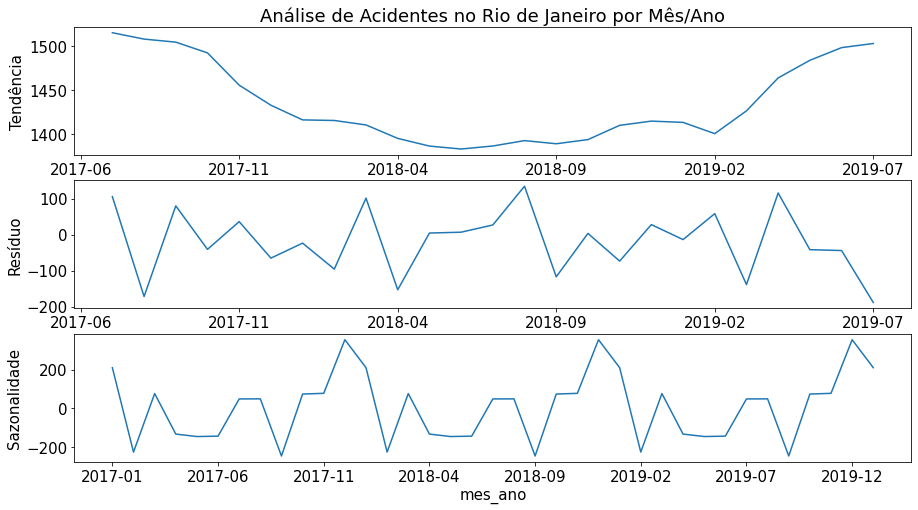

In [155]:
# Vamos decompor a amostra para entender tendência, sazonalidade e resíduo

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))

decomposicao.trend.plot(ax=ax1, title='Análise de Acidentes no Rio de Janeiro por Mês/Ano')
ax1.set_ylabel('Tendência')

decomposicao.resid.plot(ax=ax2)
ax2.set_ylabel('Resíduo')

decomposicao.seasonal.plot(ax=ax3)
ax3.set_ylabel('Sazonalidade')

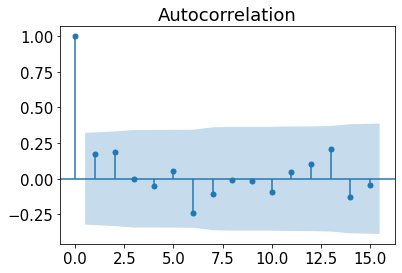

In [156]:
#Autocorrelação (AR)
acid_autocor = sm.graphics.tsa.plot_acf(acid_treino.values.squeeze(),lags = 15)

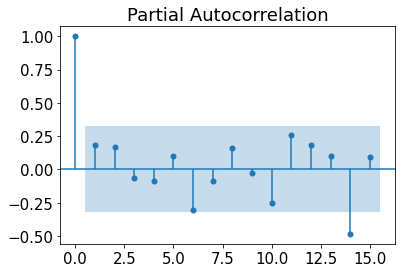

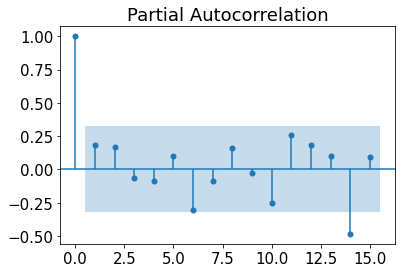

In [157]:
#Média móvel (MA)
sm.graphics.tsa.plot_pacf(acid_treino.values.squeeze(), lags = 15)

## Vamos aplicar o teste de Dickey Fuller para descobrir se a série é estacionária

In [158]:
# Teste Dickey-Fuller - função para exibir o teste Augmented Dickey-Fuller
xx = acid_treino.values
result = adfuller(xx)
print('ADF Statistic: %f' % result[0])
print('p-value:%f'% result[1])
print('Num de observações usadas para regressão ADF %f'% result [3])
print("Critical Values:")
for key, values in result[4].items():
    print('\t%s: %.3f' % (key, values))

# O p-value deu bem pequeno (<0,05%), então consideramos a série como estacionária.

ADF Statistic: -4.656006
p-value:0.000102
Num de observações usadas para regressão ADF 36.000000
Critical Values:
	1%: -3.627
	5%: -2.946
	10%: -2.612


# .................................................................................................................................
# MODELO AUTO ARIMA - ACIDENTES
# .................................................................................................................................

#  Auto ARIMA - Acidentes

In [245]:
# Criando o modelo do auto arima
autoarima_acid = auto_arima(acid_treino, trace=True, seasonal = True, start_p = 0, start_q =0, max_p = 2, max_q = 2, d=0, error_action='ignore', suppress_warnings=True, stepwise=True)
autoarima_acid_ajustado = autoarima_acid.fit(acid_treino)
autoarima_acid_ajustado

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=502.278, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=503.081, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=503.411, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=647.492, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=504.905, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.208 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [247]:
# Sumário do modelo
autoarima_acid_ajustado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   37
Model:                        SARIMAX   Log Likelihood                -249.139
Date:                Mon, 18 Oct 2021   AIC                            502.278
Time:                        18:17:51   BIC                            505.500
Sample:                             0   HQIC                           503.414
                                 - 37                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1472.1622     33.488     43.960      0.000    1406.526    1537.798
sigma2      4.132e+04   1.12e+04      3.695      0.000    1.94e+04    6.32e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.23   Jarque-Bera (JB):                 0.45
Prob(Q):                              0.27   Prob(JB):                         0.80
Heteroskedasticity (H):               2.95   Skew:                            -0.08
Prob(H) (two-sided):                  0.07   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [161]:
# Criando o Forecast
forecast_autoarima_acid = autoarima_acid.predict(n_periods=len(acid_teste))
forecast_autoarima_acid = pd.DataFrame(forecast_autoarima_acid,index = acid_teste.index,columns=['Prediction'])

In [162]:
# Reindexando Base Teste
newindexteste = ['2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-10', '2020-11']
acid_teste.reindex(newindexteste)
acid_teste


mes_ano
2020-02    1808
2020-03    1171
2020-04     890
2020-05    1179
2020-06    1144
2020-07    1469
2020-08    1650
2020-10    1673
2020-11    2076
dtype: int64

In [163]:
# Reindexando Base Treino
newindextreino = ['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01']
acid_treino.reindex(newindextreino)
acid_treino

mes_ano
2017-01    1460
2017-02    1410
2017-03    1356
2017-04    1634
2017-05    1600
2017-06    1439
2017-07    1669
2017-08    1385
2017-09    1339
2017-10    1525
2017-11    1569
2017-12    1721
2018-01    1602
2018-02    1095
2018-03    1588
2018-04    1110
2018-05    1246
2018-06    1247
2018-07    1462
2018-08    1576
2018-09    1027
2018-10    1471
2018-11    1414
2018-12    1796
2019-01    1609
2019-02    1234
2019-03    1364
2019-04    1447
2019-05    1297
2019-06    1311
2019-07    1363
2019-08    1369
2019-09    1854
2019-10    1540
2019-11    1824
2019-12    1731
2020-01    1786
dtype: int64

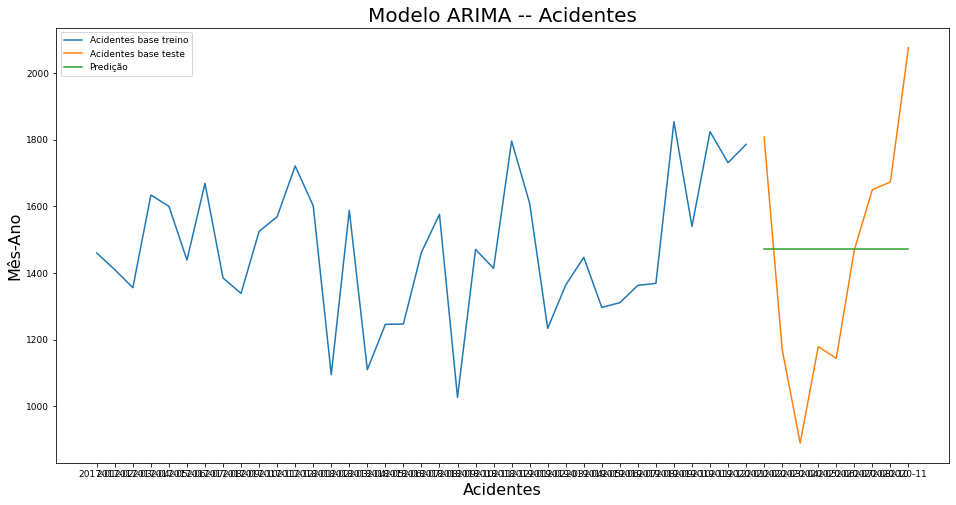

In [244]:
# Plotando a comparação Predições x Esperado
plt.figure(figsize = (16,8))
plt.plot(acid_treino, label='Acidentes base treino')
plt.plot(acid_teste, label='Acidentes base teste')
plt.plot(forecast_autoarima_acid, label='Predição')
plt.title("Modelo ARIMA -- Acidentes", fontsize=20)
plt.xlabel("Acidentes", fontsize = 16)
plt.ylabel("Mês-Ano", fontsize = 16)
plt.legend()
plt.rcParams.update({'font.size': 9})
plt.show()


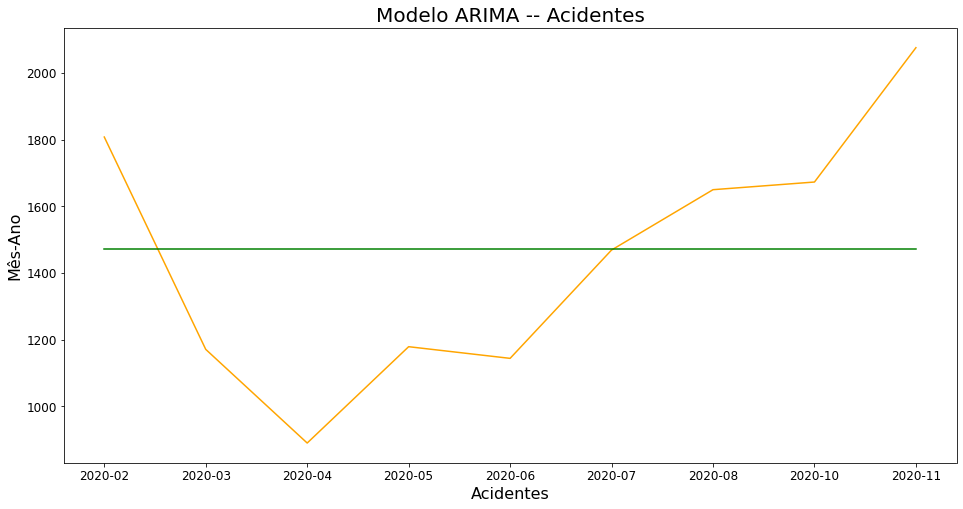

In [241]:
# Focando no período predito
plt.figure(figsize = (16,8))
plt.plot(acid_teste, label='Acidentes base teste', color = 'orange')
plt.plot(forecast_autoarima_acid, label='Predição', color = 'green')
plt.title("Modelo ARIMA -- Acidentes", fontsize=20)
plt.xlabel("Acidentes", fontsize = 16)
plt.ylabel("Mês-Ano", fontsize = 16)
plt.show()

# ##########################################################
# ##########################################################
#  .................................. BASE INFRAÇÕES...............................................
#  ##########################################################
# ##########################################################

In [166]:
import copy
infracao_copy = pd.DataFrame(columns = infracao.columns, data = copy.deepcopy(infracao.values))
infracao1 = infracao_copy.astype({"Data":str})
infracao1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3590450 entries, 0 to 3590449
Data columns (total 12 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Data         object
 1   UF           object
 2   BR           object
 3   Codigo       object
 4   Descricao    object
 5   Hora         object
 6   Responsavel  object
 7   Tipo         object
 8   Periodo      object
 9   ano          object
 10  mes_ano      object
 11  Mes          object
dtypes: object(12)
memory usage: 328.7+ MB


In [167]:
# Verificando os tipos das colunas
infracao1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3590450 entries, 0 to 3590449
Data columns (total 12 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Data         object
 1   UF           object
 2   BR           object
 3   Codigo       object
 4   Descricao    object
 5   Hora         object
 6   Responsavel  object
 7   Tipo         object
 8   Periodo      object
 9   ano          object
 10  mes_ano      object
 11  Mes          object
dtypes: object(12)
memory usage: 328.7+ MB


In [168]:
#Convertendo tipos de colunas
infracao1['Data']= pd.to_datetime(infracao1['Data'])
infracao1.head()

,Data,UF,BR,Codigo,Descricao,Hora,Responsavel,Tipo,Periodo,ano,mes_ano,Mes
0,2017-01-01,RJ,116,74550,Transitar em velocidade superior à máxima perm...,0,Condutor,Média,Madrugada,2017,2017-01,Janeiro
1,2017-01-01,RJ,101,74550,Transitar em velocidade superior à máxima perm...,0,Condutor,Média,Madrugada,2017,2017-01,Janeiro
2,2017-01-01,RJ,101,74550,Transitar em velocidade superior à máxima perm...,0,Condutor,Média,Madrugada,2017,2017-01,Janeiro
3,2017-01-01,RJ,101,74550,Transitar em velocidade superior à máxima perm...,0,Condutor,Média,Madrugada,2017,2017-01,Janeiro
4,2017-01-01,RJ,116,74550,Transitar em velocidade superior à máxima perm...,0,Condutor,Média,Madrugada,2017,2017-01,Janeiro


In [169]:
infracao1.set_index('mes_ano',inplace = True)

## Criando as séries - Infrações

In [170]:
#Criando a serie de Ocorrências por ano
infra_porano = infracao1.groupby('ano').size()
infra_porano.head()

ano
2017     820363
2018    1118090
2019     750338
2020     901659
dtype: int64

In [171]:
#Criando a série de Ocorrências por ano
infra_pormes = infracao1.groupby('Mes').size().sort_values(ascending=False)
infra_pormes

Mes
Dezembro     370825
Novembro     353682
Outubro      349490
Janeiro      328918
Fevereiro    317734
Março        310639
Junho        307104
Abril        285379
Agosto       256076
Julho        253433
Setembro     249159
Maio         208011
dtype: int64

In [172]:
#Criando a serie de Ocorrências por mes_ano
infra_mesano = infracao1.groupby('mes_ano').size()
infra_mesano.head()

mes_ano
2017-01    95091
2017-02    91954
2017-03    82709
2017-04    78870
2017-05    31823
dtype: int64

In [173]:
infra_mesporano = infracao1.groupby(['Mes','ano']).agg({'ano': 'count'}).unstack()
infra_mesporano

ano                      
ano          2017    2018   2019   2020
Mes                                    
Abril       78870  101155  53998  51356
Agosto      23927   81857  65338  84954
Dezembro    95110  107651  78317  89747
Fevereiro   91954  104413  38549  82818
Janeiro     95091   97591  74497  61739
Julho       20464   99237  55767  77965
Junho       73844   90802  65564  76894
Maio        31823   63897  48381  63910
Março       82709   95025  59704  73201
Novembro    91705   91043  75740  95194
Outubro    107835   91024  71157  79474
Setembro    27031   94395  63326  64407

In [174]:
infra_ano_periodo = infracao1.groupby(['ano','Periodo']).agg({'Periodo': 'count'}).unstack()
infra_ano_periodo

Periodo                        
Periodo Madrugada   Manhã   Noite   Tarde
ano                                      
2017        56678  312322  109529  341834
2018       101621  411481  167907  437081
2019        71903  273319  122196  282920
2020        88133  317807  149921  345798

In [175]:
infra_ano_tipo = infracao1.groupby(['ano','Tipo']).agg({'Tipo': 'count'}).unstack()
infra_ano_tipo

Tipo                                 
Tipo Auto-suspensiva   Grave Gravíssima  Leve   Média
ano                                                  
2017            9892  140567      73613  8657  587634
2018           11237  143582      60101  5395  897775
2019           11683  145677      75163  5659  512156
2020           14214  179681      77092  3847  626825

In [176]:
infra_mesano_tipo = infracao1.groupby(['Mes', 'Tipo']).agg({'Tipo': 'count'}).unstack()
infra_mesano_tipo

Tipo                                
Tipo      Auto-suspensiva  Grave Gravíssima  Leve   Média
Mes                                                      
Abril                3580  48013      18983  1924  212879
Agosto               3496  46157      25850  2334  178239
Dezembro             4580  56212      33018  1949  275066
Fevereiro            4694  57274      25260  1534  228972
Janeiro              4390  52506      25936  1790  244296
Julho                3330  45200      20572  2152  182179
Junho                3823  52656      19554  2679  228392
Maio                 3385  42377      19533  2105  140611
Março                3898  52172      18029  1377  235163
Novembro             4149  53127      26512  1354  268540
Outubro              4143  57199      25898  1900  260350
Setembro             3558  46614      26824  2460  169703

In [177]:
infra_ano_br = infracao1.groupby(['ano','BR']).agg({'BR': 'count'}).unstack()
infra_ano_br.head()

BR                                                         
BR       40      101     116 354   356    393    465 485    493   495
ano                                                                  
2017  205958  182885  358957  81  3496  45539  18990  67   3490   900
2018  208666  423932  419912  53  2383  53612   5660  79   3261   532
2019   60165  298179  304798  35  8562  61001   8176  85   8455   882
2020   48907  615395  160690  39  7019  44396  10124  13  12201  2875

## Plotando os gráficos - Infrações

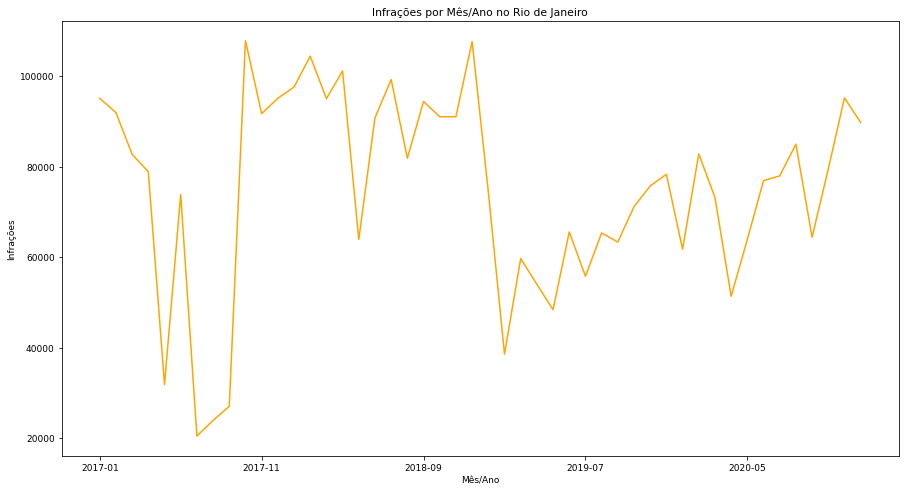

In [178]:
#Plotando gráfico "Infrações por Mês/Ano no Rio de Janeiro'
ax = infra_mesano.plot(kind='line', color = 'orange', title='Infrações por Mês/Ano no Rio de Janeiro', figsize=(15,8))
ax.set_ylabel('Infrações')
ax.set_xlabel('Mês/Ano')
plt.rcParams.update({'font.size': 15})

plt.show()

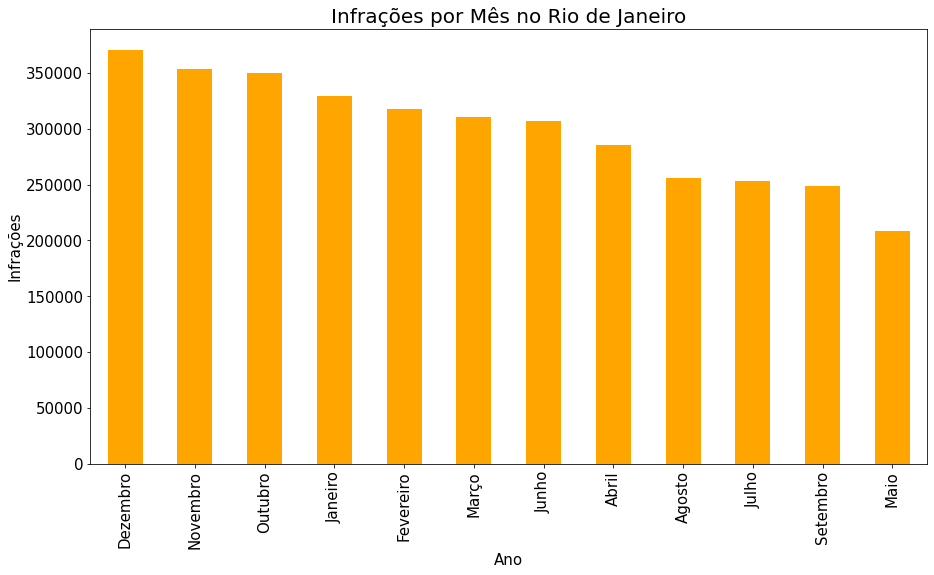

In [179]:
#Plotando gráfico "Infrações por Mês no Rio de Janeiro'
ax = infra_pormes.plot(kind='bar', color = 'orange', figsize=(15,8))
ax.set_ylabel('Infrações')
ax.set_xlabel('Ano')
ax.set_title('Infrações por Mês no Rio de Janeiro', fontsize = 20)
plt.rcParams.update({'font.size': 15})

plt.show()

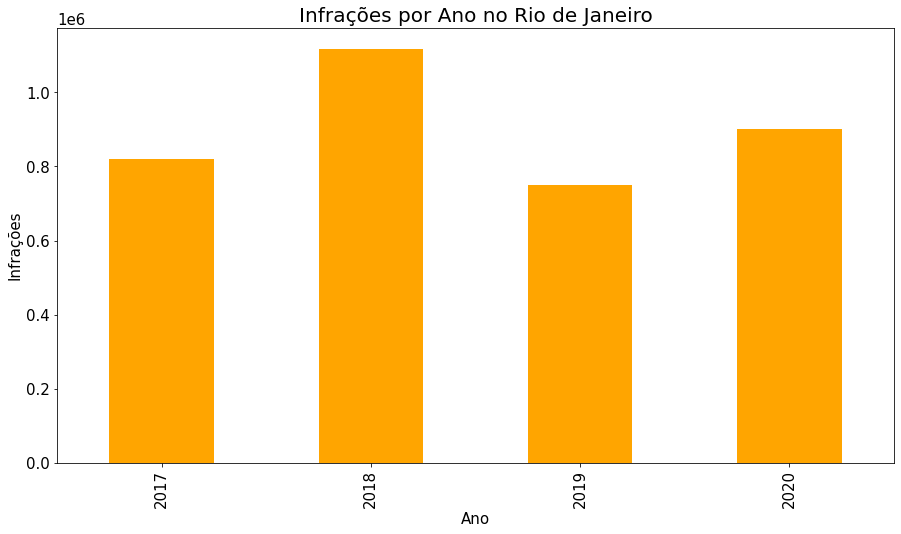

In [180]:
#Plotando gráfico "Infrações por Ano no Rio de Janeiro'
ax = infra_porano.plot(kind='bar', color = 'orange', figsize=(15,8))
ax.set_ylabel('Infrações')
ax.set_xlabel('Ano')
ax.set_title('Infrações por Ano no Rio de Janeiro', fontsize = 20)
plt.rcParams.update({'font.size': 15})

plt.show()

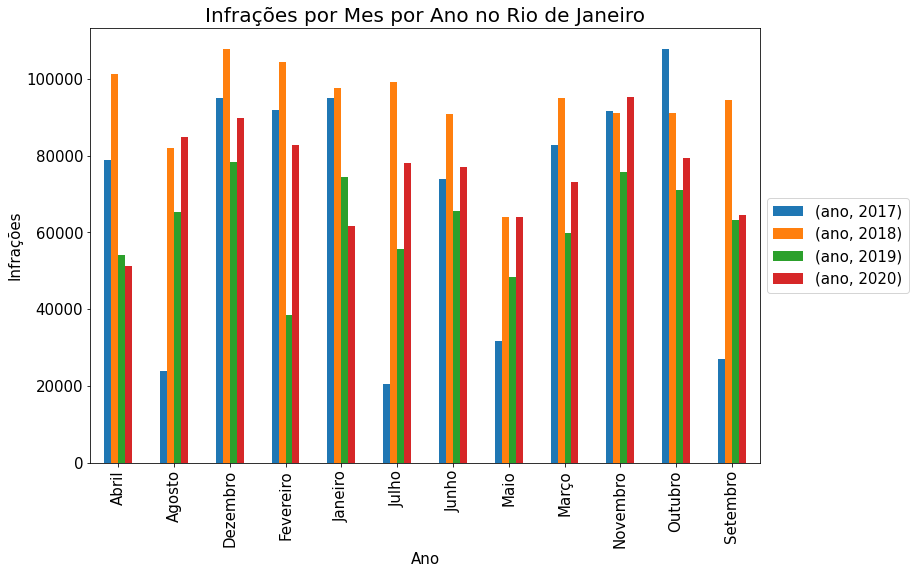

In [181]:
#Plotando gráfico "Infrações por Mês e por Ano no Rio de Janeiro'
ax = infra_mesporano.plot(kind='bar', figsize=(15,8))
ax.set_ylabel('Infrações')
ax.set_xlabel('Ano')
ax.set_title('Infrações por Mes por Ano no Rio de Janeiro', fontsize = 20)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams.update({'font.size': 15})

plt.show()

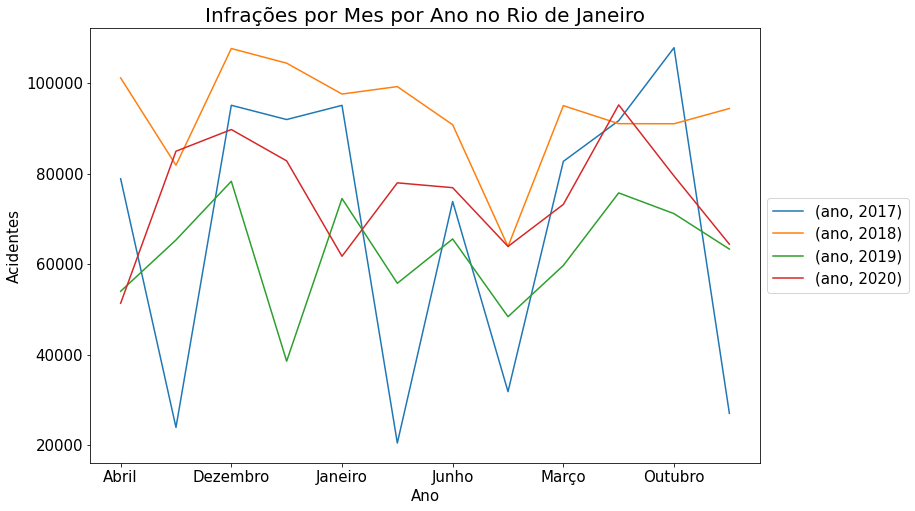

In [182]:
#Plotando gráfico "Infrações por Mês e por Ano no Rio de Janeiro'
ax = infra_mesporano.plot(kind='line', figsize=(15,8))
ax.set_ylabel('Acidentes')
ax.set_xlabel('Ano')
ax.set_title('Infrações por Mes por Ano no Rio de Janeiro', fontsize = 20)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams.update({'font.size': 15})

plt.show()

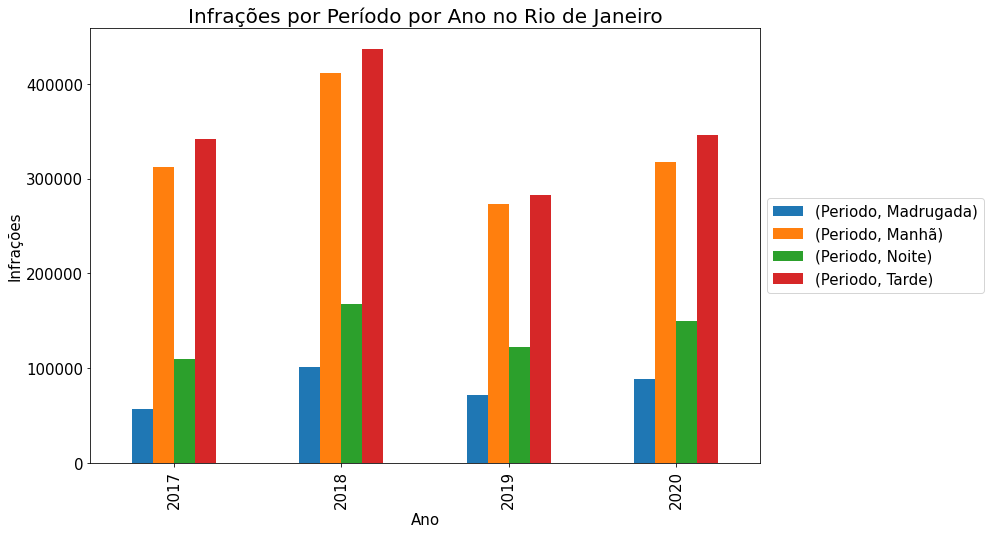

In [183]:
#Plotando gráfico "Infrações por Período e Ano no Rio de Janeiro'
ax = infra_ano_periodo.plot(kind='bar', figsize=(15,8))
ax.set_ylabel('Infrações')
ax.set_xlabel('Ano')

ax.set_title('Infrações por Período por Ano no Rio de Janeiro', fontsize = 20)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams.update({'font.size': 15})

plt.show()

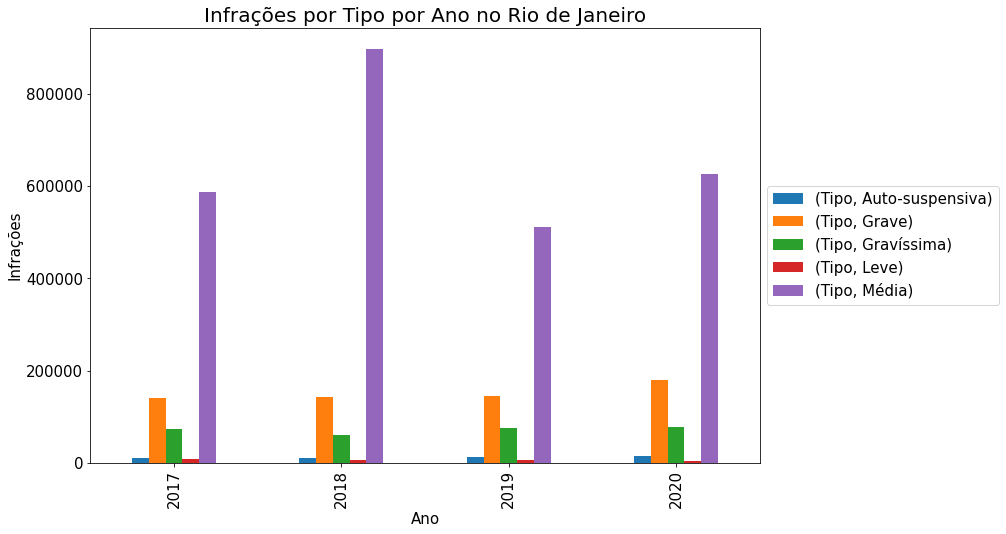

In [184]:
#Plotando gráfico "Infrações por Tipo Ano no Rio de Janeiro'
ax = infra_ano_tipo.plot(kind='bar',  figsize=(15,8))
ax.set_ylabel('Infrações')
ax.set_xlabel('Ano')
ax.set_title('Infrações por Tipo por Ano no Rio de Janeiro', fontsize = 20)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams.update({'font.size': 15})
plt.show()

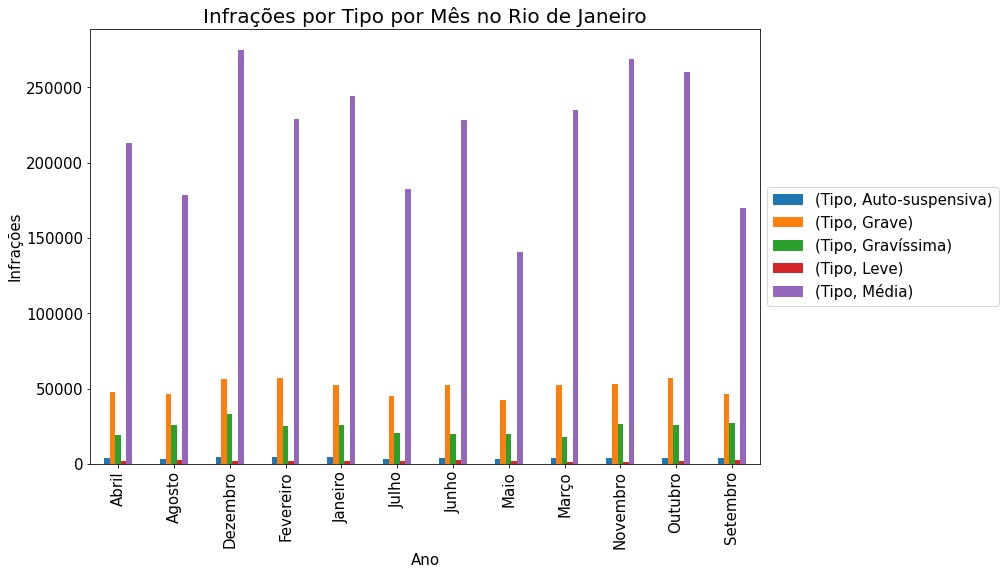

In [185]:
#Plotando gráfico "Infrações por Tipo Ano no Rio de Janeiro'
ax = infra_mesano_tipo.plot(kind='bar',  figsize=(15,8))
ax.set_ylabel('Infrações')
ax.set_xlabel('Ano')
ax.set_title('Infrações por Tipo por Mês no Rio de Janeiro', fontsize = 20)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams.update({'font.size': 15})
plt.show()

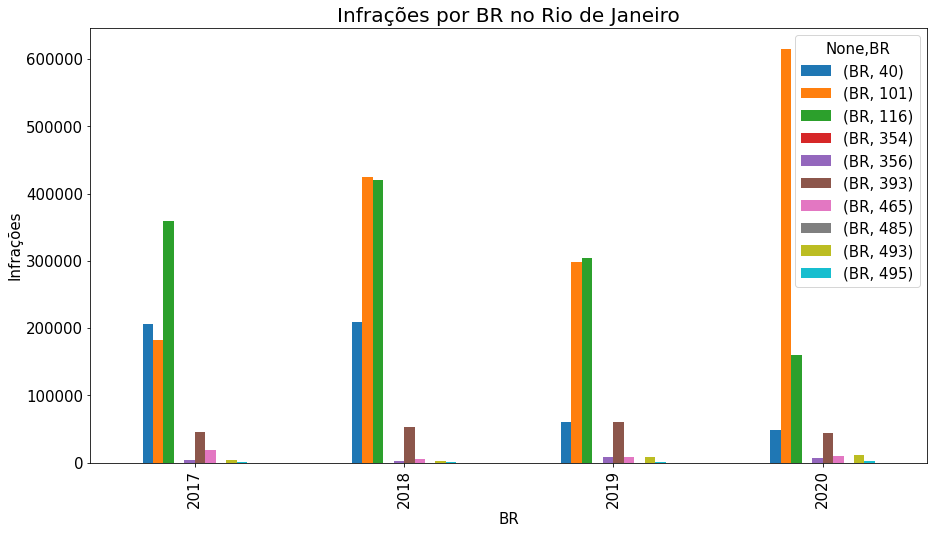

In [186]:
#Plotando gráfico "Infrações por BR no Rio de Janeiro'
ax = infra_ano_br.plot(kind='bar', figsize=(15,8))
ax.set_ylabel('Infrações')
ax.set_xlabel('BR')
ax.set_title('Infrações por BR no Rio de Janeiro', fontsize = 20)
plt.rcParams.update({'font.size': 15})

plt.show()

<AxesSubplot:>

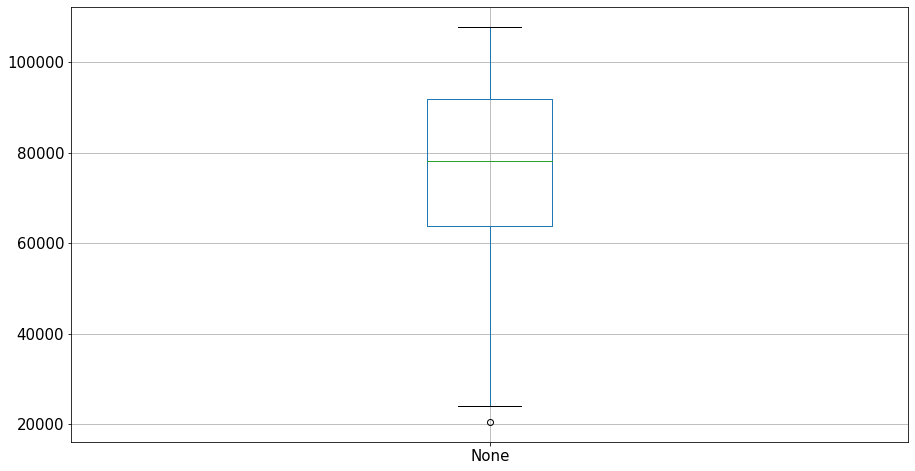

In [187]:
# Plotando gráfico boxplot com os quartis, outliers, valores mínimos e máximos
infra_mesano.plot.box(figsize=(15,8), grid = True)

## Dados estatísticos das Séries - Infrações

In [188]:
# Análise estatística de Infrações por Mês-Ano
infra_mesano.describe()

count        48.000000
mean      74801.041667
std       22081.803702
min       20464.000000
25%       63754.250000
50%       78141.000000
75%       91767.250000
max      107835.000000
dtype: float64

In [189]:
# Análise estatística de Infrações por Ano
infra_porano.describe()

count    4.000000e+00
mean     8.976125e+05
std      1.594616e+05
min      7.503380e+05
25%      8.028568e+05
50%      8.610110e+05
75%      9.557668e+05
max      1.118090e+06
dtype: float64

## Retirando Outliers - Infrações

In [190]:
#Determinando os qs (infra_mesano)
novo_q1= 63754.25
novo_q2 = 78141
novo_q3= 91767.25
iqr = (novo_q3-novo_q1)
fator = 1.5
lowpass = novo_q1-(iqr*fator)
highpass = novo_q3+(iqr*fator)


def removeoutlier1(value):
        if value > highpass: 
            return -1
        elif value < lowpass:
            return -1
        else:
            return value

In [191]:
infracao3 = infra_mesano.apply(lambda value: removeoutlier1(value))

In [192]:
infracao3.sort_values(ascending=True)[:5]

mes_ano
2017-07       -1
2017-08    23927
2017-09    27031
2017-05    31823
2019-02    38549
dtype: int64

In [193]:
infracao_ok = infracao3.drop(labels = ['2017-07'])
infracao_ok.sort_values(ascending=True)[:5]

mes_ano
2017-08    23927
2017-09    27031
2017-05    31823
2019-02    38549
2019-05    48381
dtype: int64

<AxesSubplot:>

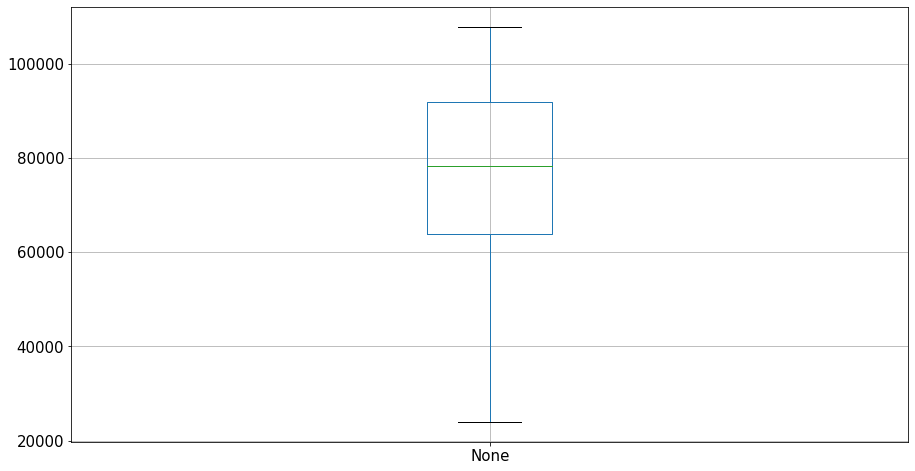

In [194]:
# Plotando gráfico boxplot com os quartis, outliers, valores mínimos e máximos
infracao_ok.plot.box(figsize=(15,8), grid = True)

# Iniciar preparaçao para o ARIMA - Infrações

## Dividindo as bases
Total são 47 meses (pois retiramos 1 de 2017)

BASE DE TREINO -> Então ficam 80% de 47 = 37.6 que vamos aproximar para 38

BASE DE TESTE -> Os últimos 9 meses

In [195]:
import copy
prebases1 = infracao_ok.copy(deep=True)
type(prebases1)

pandas.core.series.Series

In [196]:
# Criando e visualizando base treino
infra_treino = prebases1.iloc[0:38]
infra_treino

mes_ano
2017-01     95091
2017-02     91954
2017-03     82709
2017-04     78870
2017-05     31823
2017-06     73844
2017-08     23927
2017-09     27031
2017-10    107835
2017-11     91705
2017-12     95110
2018-01     97591
2018-02    104413
2018-03     95025
2018-04    101155
2018-05     63897
2018-06     90802
2018-07     99237
2018-08     81857
2018-09     94395
2018-10     91024
2018-11     91043
2018-12    107651
2019-01     74497
2019-02     38549
2019-03     59704
2019-04     53998
2019-05     48381
2019-06     65564
2019-07     55767
2019-08     65338
2019-09     63326
2019-10     71157
2019-11     75740
2019-12     78317
2020-01     61739
2020-02     82818
2020-03     73201
dtype: int64

In [197]:
type(infra_treino)

pandas.core.series.Series

In [198]:
infra_treino.shape

(38,)

In [199]:
# Criando e visualizando base teste
infra_teste = prebases1.iloc[38:47]
infra_teste

mes_ano
2020-04    51356
2020-05    63910
2020-06    76894
2020-07    77965
2020-08    84954
2020-09    64407
2020-10    79474
2020-11    95194
2020-12    89747
dtype: int64

In [200]:
type(infra_teste)

pandas.core.series.Series

In [201]:
infra_teste.shape

(9,)

## Análises Estatísticas - Infrações

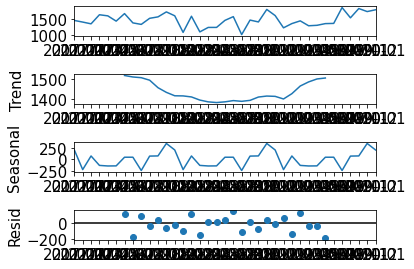

In [202]:
# Primeiro vamos decompor a amosta para entender tendência, sazonalidade e resíduo
decomposicao2 = seasonal_decompose(infra_treino, period=12)
imagem2 = decomposicao.plot()

Text(0, 0.5, 'Sazonalidade')

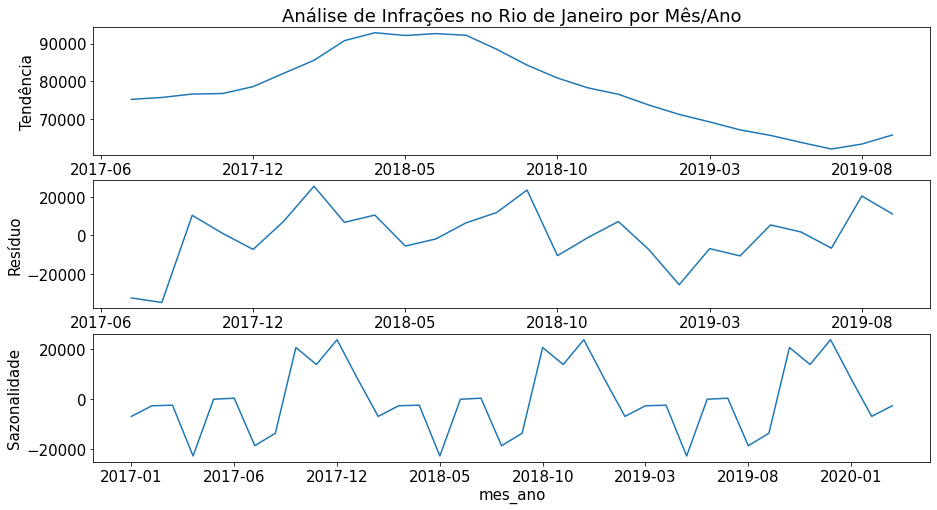

In [203]:
# Vamos decompor a amostra para entender tendência, sazonalidade e resíduo
novo_fig, (novo_ax1,novo_ax2,novo_ax3) = plt.subplots(3,1, figsize=(15,8))

decomposicao2.trend.plot(ax= novo_ax1, title='Análise de Infrações no Rio de Janeiro por Mês/Ano')
novo_ax1.set_ylabel('Tendência')

decomposicao2.resid.plot(ax= novo_ax2)
novo_ax2.set_ylabel('Resíduo')

decomposicao2.seasonal.plot(ax = novo_ax3)
novo_ax3.set_ylabel('Sazonalidade')

In [204]:
# Teste Dickey-Fuller - função para exibir o teste Augmented Dickey-Fuller
az = infra_treino.values
result2 = adfuller(az)
print('ADF Statistic: %f' % result2[0])
print('p-value:%f'% result2[1])
print("Critical Values:")
for key, values in result2[4].items():
    print('\t%s: %.3f' % (key, values))

# O p-value foi > 0,05%, então consideramos a série como não estacionária.

ADF Statistic: -3.810059
p-value:0.002806
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


In [88]:
# Aplicando a diferenciação na série e removendo dados nulos
infra_treino_diff1 = infra_treino.diff()
infra_treino_diff1 = infra_treino_diff1.dropna()

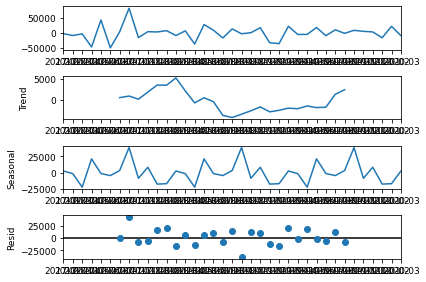

In [303]:
# Decompondo os dado agora da série diferenciada
decomposicao3 = seasonal_decompose(infra_treino_diff1, period=12)
imagem3 = decomposicao3.plot()

Text(0, 0.5, 'Sazonalidade')

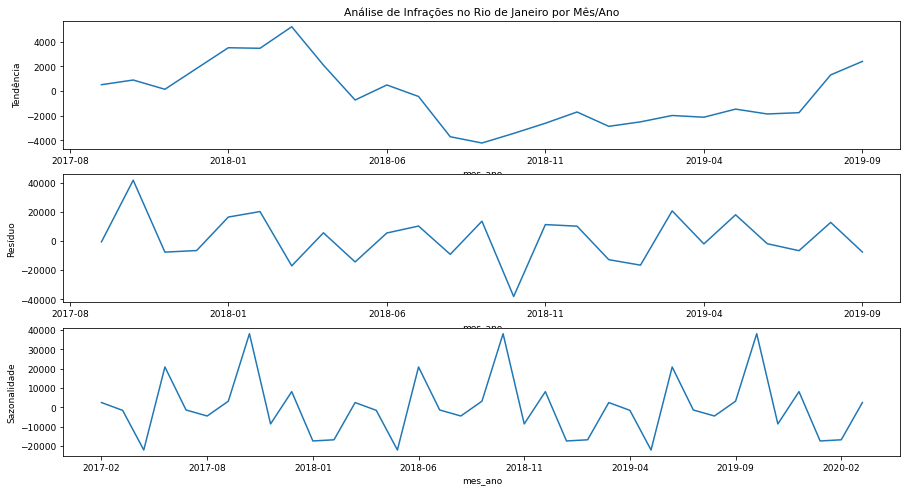

In [304]:
# Vamos decompor a amostra para entender tendência, sazonalidade e resíduo
novo2_fig, (novo2_ax1,novo2_ax2,novo2_ax3) = plt.subplots(3,1, figsize=(15,8))

decomposicao3.trend.plot(ax= novo2_ax1, title='Análise de Infrações no Rio de Janeiro por Mês/Ano')
novo2_ax1.set_ylabel('Tendência')

decomposicao3.resid.plot(ax= novo2_ax2)
novo2_ax2.set_ylabel('Resíduo')

decomposicao3.seasonal.plot(ax = novo2_ax3)
novo2_ax3.set_ylabel('Sazonalidade')

In [315]:
# Teste Dickey-Fuller - função para exibir o teste Augmented Dickey-Fuller

az2 = infra_treino_diff1.values
result3 = adfuller(az2)
print('ADF Statistic: %f' % result3[0])
print('p-value:%f'% result3[1])
print("Critical Values:")
for key, values in result3[4].items():
    print('\t%s: %.3f' % (key, values))

ADF Statistic: -1.219880
p-value:0.664986
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630


In [307]:
# Aplicando a diferenciação na série e removendo dados nulos
infra_treino_diff2 = infra_treino_diff1.diff()
infra_treino_diff2 = infra_treino_diff2.dropna()

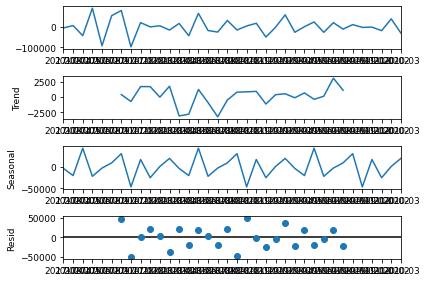

In [308]:
# Decompondo os dado agora da série diferenciada
decomposicao4 = seasonal_decompose(infra_treino_diff2, period=12)
imagem4 = decomposicao4.plot()

Text(0, 0.5, 'Sazonalidade')

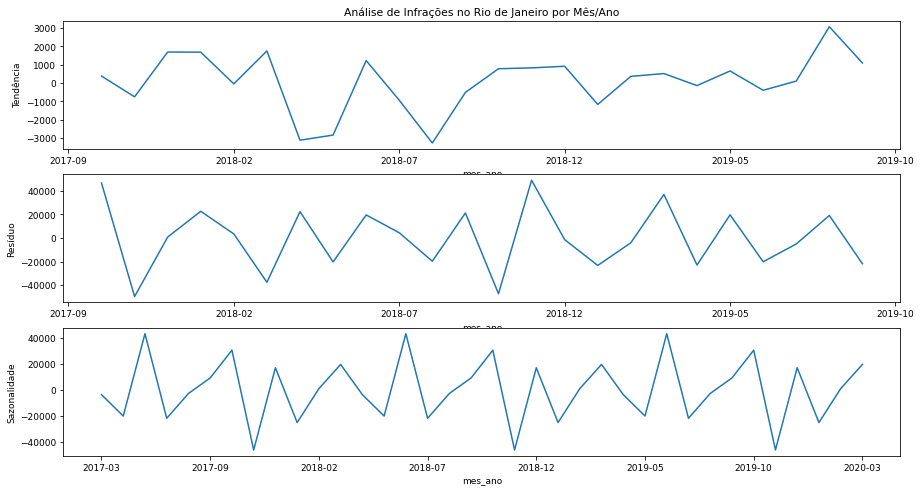

In [309]:
# Vamos decompor a amostra para entender tendência, sazonalidade e resíduo
novo3_fig, (novo3_ax1,novo3_ax2,novo3_ax3) = plt.subplots(3,1, figsize=(15,8))

decomposicao4.trend.plot(ax= novo3_ax1, title='Análise de Infrações no Rio de Janeiro por Mês/Ano')
novo3_ax1.set_ylabel('Tendência')

decomposicao4.resid.plot(ax= novo3_ax2)
novo3_ax2.set_ylabel('Resíduo')

decomposicao4.seasonal.plot(ax = novo3_ax3)
novo3_ax3.set_ylabel('Sazonalidade')

In [316]:
# Teste Dickey-Fuller - função para exibir o teste Augmented Dickey-Fuller

az3 = infra_treino_diff2.values
result4 = adfuller(az3)
print('ADF Statistic: %f' % result4[0])
print('p-value:%f'% result4[1])
print("Critical Values:")
for key, values in result4[4].items():
    print('\t%s: %.3f' % (key, values))

ADF Statistic: -3.610456
p-value:0.005564
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630


In [311]:
# Aplicando a diferenciação na série e removendo dados nulos
infra_treino_diff3 = infra_treino_diff2.diff()
infra_treino_diff3 = infra_treino_diff3.dropna()

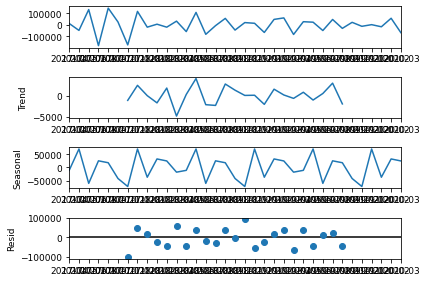

In [312]:
# Decompondo os dado agora da série diferenciada
decomposicao5 = seasonal_decompose(infra_treino_diff3, period=12)
imagem5 = decomposicao5.plot()

Text(0, 0.5, 'Sazonalidade')

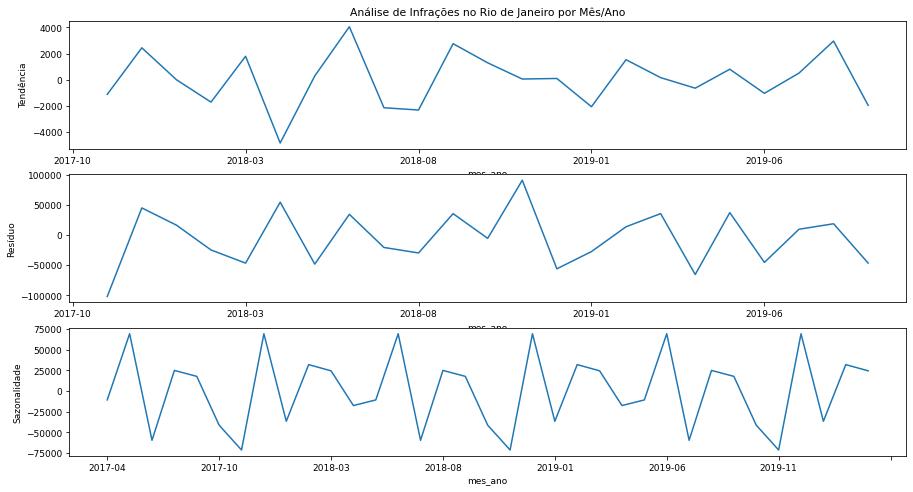

In [313]:
# Vamos decompor a amostra para entender tendência, sazonalidade e resíduo
novo4_fig, (novo4_ax1,novo4_ax2,novo4_ax3) = plt.subplots(3,1, figsize=(15,8))

decomposicao5.trend.plot(ax= novo4_ax1, title='Análise de Infrações no Rio de Janeiro por Mês/Ano')
novo4_ax1.set_ylabel('Tendência')

decomposicao5.resid.plot(ax= novo4_ax2)
novo4_ax2.set_ylabel('Resíduo')

decomposicao5.seasonal.plot(ax = novo4_ax3)
novo4_ax3.set_ylabel('Sazonalidade')

In [317]:
# Teste Dickey-Fuller - função para exibir o teste Augmented Dickey-Fuller

az4 = infra_treino_diff3.values
result5 = adfuller(az4)
print('ADF Statistic: %f' % result5[0])
print('p-value:%f'% result5[1])
print("Critical Values:")
for key, values in result5[4].items():
    print('\t%s: %.3f' % (key, values))

ADF Statistic: -3.755330
p-value:0.003399
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633


In [318]:
# Aplicando a diferenciação na série e removendo dados nulos
infra_treino_diff4 = infra_treino_diff3.diff()
infra_treino_diff4 = infra_treino_diff4.dropna()

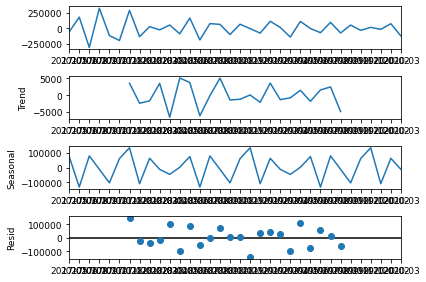

In [319]:
# Decompondo os dado agora da série diferenciada
decomposicao6 = seasonal_decompose(infra_treino_diff4, period=12)
imagem6 = decomposicao6.plot()

Text(0, 0.5, 'Sazonalidade')

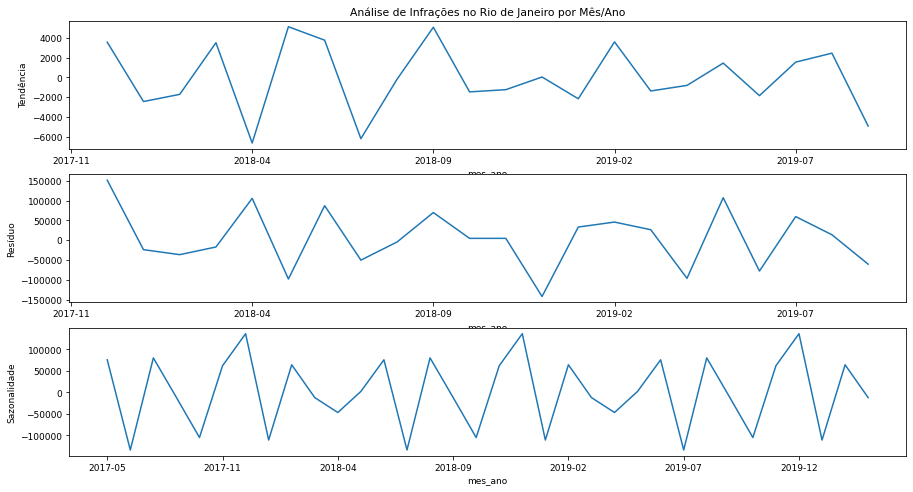

In [320]:
# Vamos decompor a amostra para entender tendência, sazonalidade e resíduo
novo5_fig, (novo5_ax1,novo5_ax2,novo5_ax3) = plt.subplots(3,1, figsize=(15,8))

decomposicao6.trend.plot(ax= novo5_ax1, title='Análise de Infrações no Rio de Janeiro por Mês/Ano')
novo5_ax1.set_ylabel('Tendência')

decomposicao6.resid.plot(ax= novo5_ax2)
novo5_ax2.set_ylabel('Resíduo')

decomposicao6.seasonal.plot(ax = novo5_ax3)
novo5_ax3.set_ylabel('Sazonalidade')

In [321]:
# Teste Dickey-Fuller - função para exibir o teste Augmented Dickey-Fuller

az5 = infra_treino_diff4.values
result6 = adfuller(az5)
print('ADF Statistic: %f' % result6[0])
print('p-value:%f'% result6[1])
print("Critical Values:")
for key, values in result6[4].items():
    print('\t%s: %.3f' % (key, values))

ADF Statistic: -3.399420
p-value:0.010979
Critical Values:
	1%: -3.753
	5%: -2.998
	10%: -2.639


In [322]:
# Aplicando a diferenciação na série e removendo dados nulos
infra_treino_diff5 = infra_treino_diff4.diff()
infra_treino_diff5 = infra_treino_diff5.dropna()

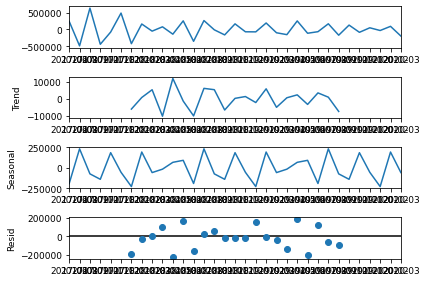

In [323]:
# Decompondo os dado agora da série diferenciada
decomposicao7 = seasonal_decompose(infra_treino_diff5, period=12)
imagem7 = decomposicao7.plot()

Text(0, 0.5, 'Sazonalidade')

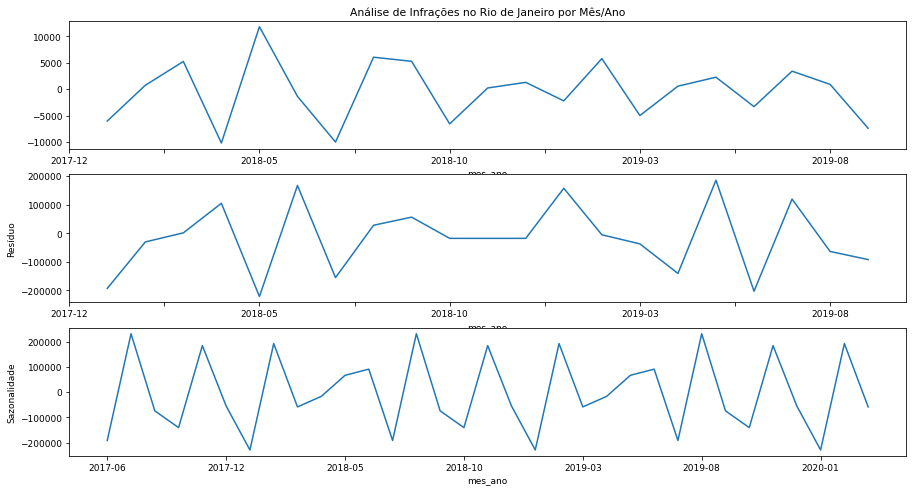

In [324]:
# Vamos decompor a amostra para entender tendência, sazonalidade e resíduo
novo6_fig, (novo6_ax1,novo6_ax2,novo6_ax3) = plt.subplots(3,1, figsize=(15,8))

decomposicao7.trend.plot(ax= novo6_ax1, title='Análise de Infrações no Rio de Janeiro por Mês/Ano')
novo5_ax1.set_ylabel('Tendência')

decomposicao7.resid.plot(ax= novo6_ax2)
novo6_ax2.set_ylabel('Resíduo')

decomposicao7.seasonal.plot(ax = novo6_ax3)
novo6_ax3.set_ylabel('Sazonalidade')

In [325]:
# Teste Dickey-Fuller - função para exibir o teste Augmented Dickey-Fuller

az6 = infra_treino_diff5.values
result7 = adfuller(az6)
print('ADF Statistic: %f' % result7[0])
print('p-value:%f'% result7[1])
print("Critical Values:")
for key, values in result7[4].items():
    print('\t%s: %.3f' % (key, values))

ADF Statistic: -3.857674
p-value:0.002369
Critical Values:
	1%: -3.770
	5%: -3.005
	10%: -2.643


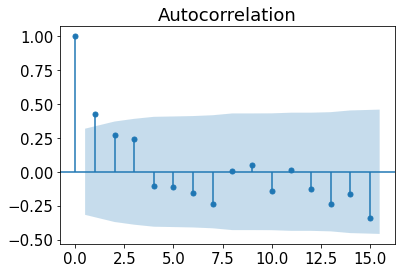

In [205]:
#Autocorrelação (AR)
infra_autocor = sm.graphics.tsa.plot_acf(infra_treino.values.squeeze(),lags = 15)

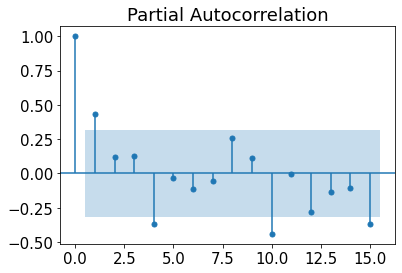

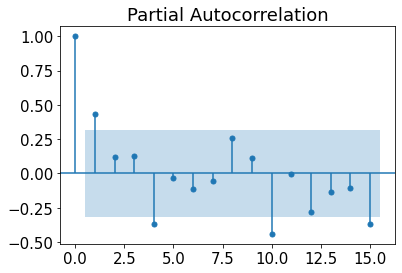

In [206]:
#Média móvel (MA)
sm.graphics.tsa.plot_pacf(infra_treino.values.squeeze(), lags = 15)

# ####################
# MODELO AUTO ARIMA - INFRAÇÕES
# ####################

# Auto ARIMA - Infrações

In [248]:
#Criando o modelo do autoarima final
autoarima_infra = auto_arima(infra_treino, trace=True, seasonal = True, stationary = False, start_p = 1 , start_q = 1 , d = 5, max_p = 5 , max_q = 3, error_action='ignore', suppress_warnings=True, stepwise=True)
autoarima_infra_ajustado = autoarima_infra.fit(infra_treino)
autoarima_infra_ajustado.aic()

Performing stepwise search to minimize aic
 ARIMA(1,5,1)(0,0,0)[0]             : AIC=858.695, Time=0.07 sec
 ARIMA(0,5,0)(0,0,0)[0]             : AIC=915.540, Time=0.01 sec
 ARIMA(1,5,0)(0,0,0)[0]             : AIC=891.823, Time=0.03 sec
 ARIMA(0,5,1)(0,0,0)[0]             : AIC=879.275, Time=0.04 sec
 ARIMA(2,5,1)(0,0,0)[0]             : AIC=826.769, Time=0.13 sec
 ARIMA(2,5,0)(0,0,0)[0]             : AIC=853.518, Time=0.10 sec
 ARIMA(3,5,1)(0,0,0)[0]             : AIC=824.966, Time=0.12 sec
 ARIMA(3,5,0)(0,0,0)[0]             : AIC=848.505, Time=0.07 sec
 ARIMA(4,5,1)(0,0,0)[0]             : AIC=817.149, Time=0.17 sec
 ARIMA(4,5,0)(0,0,0)[0]             : AIC=839.012, Time=0.05 sec
 ARIMA(5,5,1)(0,0,0)[0]             : AIC=808.763, Time=0.23 sec
 ARIMA(5,5,0)(0,0,0)[0]             : AIC=832.480, Time=0.16 sec
 ARIMA(5,5,2)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(4,5,2)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(5,5,1)(0,0,0)[0] intercept   : AIC=817.938, Time

808.7627779910424

In [249]:
autoarima_infra_ajustado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   38
Model:               SARIMAX(5, 5, 1)   Log Likelihood                -397.381
Date:                Mon, 18 Oct 2021   AIC                            808.763
Time:                        18:19:58   BIC                            819.238
Sample:                             0   HQIC                           812.287
                                 - 38                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.0115      0.207     -9.705      0.000      -2.418      -1.605
ar.L2         -2.4456      0.412     -5.939      0.000      -3.253      -1.639
ar.L3         -1.9902      0.518     -3.843      0.000      -3.005      -0.975
ar.L4         -1.2420      0.389     -3.192      0.001      -2.005      -0.479
ar.L5         -0.4347      0.200     -2.174      0.030      -0.827      -0.043
ma.L1         -0.9856      0.321     -3.070      0.002      -1.615      -0.356
sigma2      1.802e+09   1.69e-10   1.06e+19      0.000     1.8e+09     1.8e+09
===================================================================================
Ljung-Box (L1) (Q):                   1.72   Jarque-Bera (JB):                 2.18
Prob(Q):                              0.19   Prob(JB):                         0.34
Heteroskedasticity (H):               0.14   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.84e+35. Standard errors may be unstable.
"""

In [209]:
# Reindexando Base teste
newindexteste1 = ['2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12']
infra_teste.reindex(newindexteste1)
infra_teste


mes_ano
2020-04    51356
2020-05    63910
2020-06    76894
2020-07    77965
2020-08    84954
2020-09    64407
2020-10    79474
2020-11    95194
2020-12    89747
dtype: int64

In [210]:
# Reindexando Base treino
newindextreino1 = ['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03']
infra_treino.reindex(newindextreino1)
infra_treino

mes_ano
2017-01     95091
2017-02     91954
2017-03     82709
2017-04     78870
2017-05     31823
2017-06     73844
2017-08     23927
2017-09     27031
2017-10    107835
2017-11     91705
2017-12     95110
2018-01     97591
2018-02    104413
2018-03     95025
2018-04    101155
2018-05     63897
2018-06     90802
2018-07     99237
2018-08     81857
2018-09     94395
2018-10     91024
2018-11     91043
2018-12    107651
2019-01     74497
2019-02     38549
2019-03     59704
2019-04     53998
2019-05     48381
2019-06     65564
2019-07     55767
2019-08     65338
2019-09     63326
2019-10     71157
2019-11     75740
2019-12     78317
2020-01     61739
2020-02     82818
2020-03     73201
dtype: int64

In [211]:
# Criando o Forecast
forecast_autoarima_infra = autoarima_infra.predict(n_periods=len(infra_teste))
forecast_autoarima_infra = pd.DataFrame(forecast_autoarima_infra,index = infra_teste.index,columns=['Prediction'])

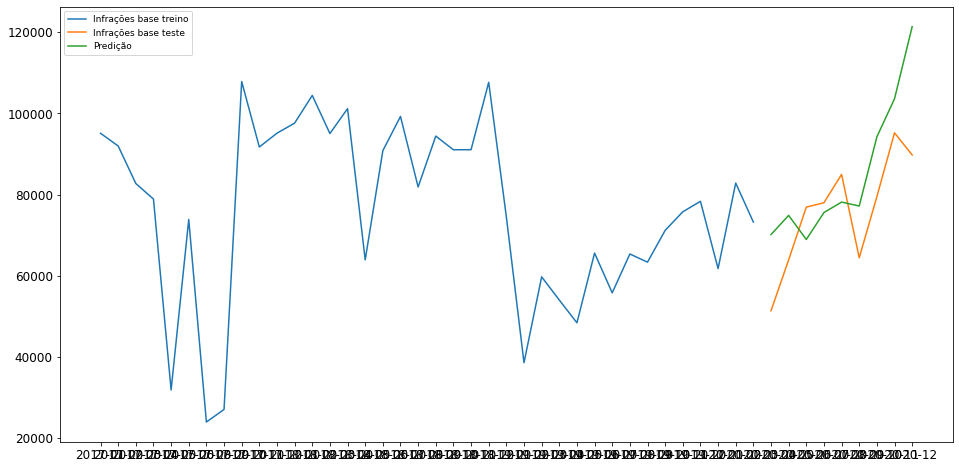

In [239]:
# Plotando gráficos
plt.figure(figsize=(16,8))
plt.plot(infra_treino, label='Infrações base treino')
plt.plot(infra_teste, label='Infrações base teste')
plt.plot(forecast_autoarima_infra, label='Predição')
plt.legend(fontsize = 9)
plt.show()

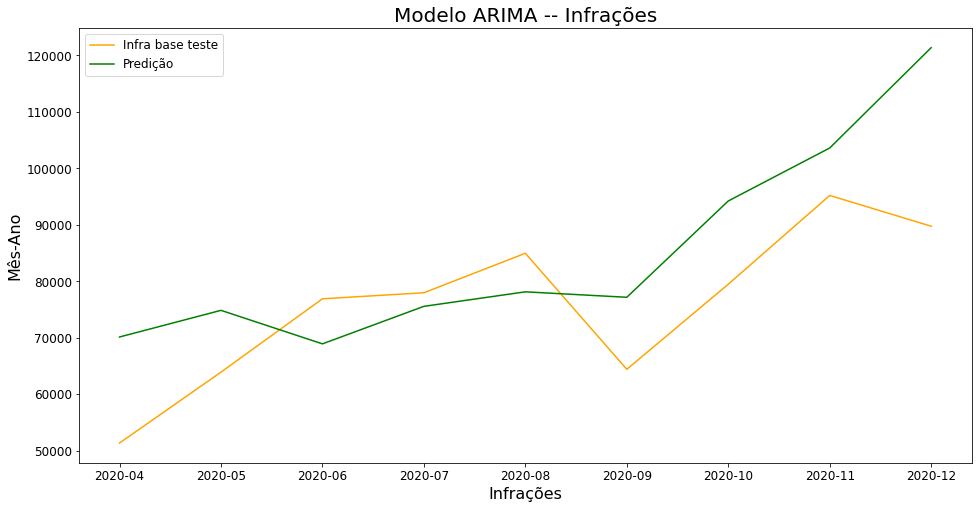

In [240]:
# Plotando gráficos
plt.figure(figsize=(16,8))
plt.plot(infra_teste, label='Infra base teste', color = 'orange')
plt.plot(forecast_autoarima_infra, label='Predição', color = 'green')
plt.title("Modelo ARIMA -- Infrações", fontsize=20)
plt.xlabel("Infrações", fontsize = 16)
plt.ylabel("Mês-Ano", fontsize = 16)
plt.legend()
plt.show()

# ################################################################
# Análise de Desempenho do ARIMA 
# ################################################################

In [253]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error

In [412]:
# Comparando o AIC obtido para as bases
print("AIC ARIMA ACIDENTES")
print(autoarima_acid_ajustado.aic())

print("AIC ARIMA INFRAÇÕES")
print(autoarima_infra_ajustado.aic())

AIC ARIMA ACIDENTES
502.27786024877526
AIC ARIMA INFRAÇÕES
808.7627779910424


In [262]:
# ARIMA - ACIDENTES
print("MSE - ARIMA ACIDENTES")
mean_forecast_error_acidarima = mean_squared_error(forecast_autoarima_acid, acid_teste)
print(mean_forecast_error_acidarima)
# ARIMA - INFRAÇÕES
print("MSE - INFRA INFRAÇÕES")
mean_forecast_error_infraarima = mean_squared_error(forecast_autoarima_infra, infra_teste)
print(mean_forecast_error_infraarima)

MSE - ARIMA ACIDENTES
130291.6899602305
MSE - INFRA INFRAÇÕES
226442502.26971498


# --------------------------------------------------------------------------------------------------------------
# MODELO HOLT - WINTERS
# -------------------------------------------------------------------------------------------------------------

### ACIDENTES

In [214]:
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, Holt, SimpleExpSmoothing   

In [215]:
# Aplicando modelo Holt-Winters - Acidentes

holtwint_acid = ExponentialSmoothing(acid_treino, seasonal_periods=12, trend="add", seasonal='add', use_boxcox=True, initialization_method="estimated")
holtwint_acid_ajustado = holtwint_acid.fit(optimized = True)

C:\Users\Camila\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [216]:
holtwint_acid_ajustado.summary()

Dep. Variable:,None,No. Observations:,37
Model:,ExponentialSmoothing,SSE,1144386.852
Optimized:,True,AIC,414.560
Trend:,Additive,BIC,440.335
Seasonal:,Additive,AICC,452.560
Seasonal Periods:,12,Date:,"Mon, 18 Oct 2021"
Box-Cox:,True,Time:,17:58:25
Box-Cox Coeff.:,1.15981,,
,coeff,code,optimized
smoothing_level,0.1410483,alpha,True
smoothing_trend,0.1358655,beta,True


In [217]:
# Criando Forecast
forecast_holtwint_acid = holtwint_acid_ajustado.forecast(9).rename("Holt Winters Seasonal - Acidentes")
forecast_holtwint_acid = forecast_holtwint_acid.set_axis(['2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-10', '2020-11'])
forecast_holtwint_acid

2020-02    1340.649043
2020-03    1618.848605
2020-04    1482.920000
2020-05    1482.423839
2020-06    1483.172188
2020-07    1736.025556
2020-08    1677.815946
2020-10    1486.552499
2020-11    1740.999379
Name: Holt Winters Seasonal - Acidentes, dtype: float64

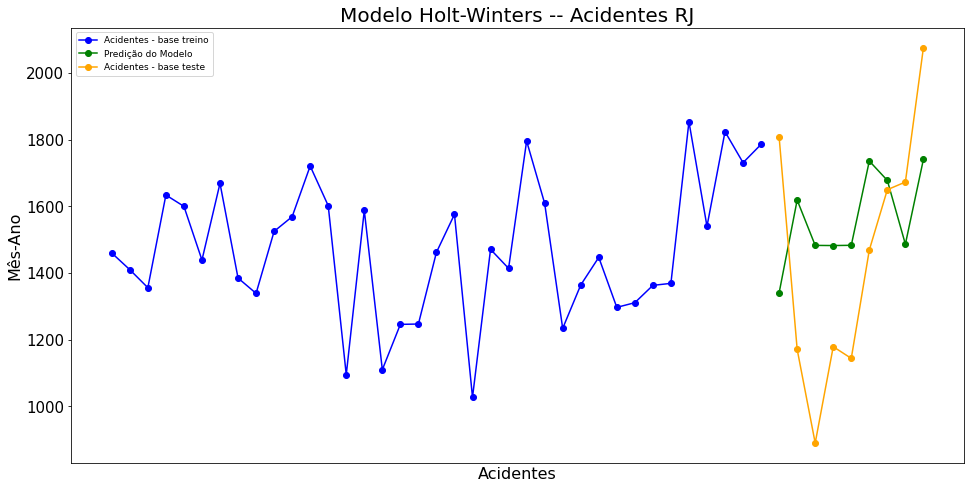

In [218]:
# Plotando os gráficos

plt.figure(figsize=(16,8))
plt.plot(acid_treino, marker="o", color = 'blue', label="Acidentes - base treino")
plt.plot(forecast_holtwint_acid, marker = "o", color = "green", label = "Predição do Modelo")
plt.plot(acid_teste, marker="o", color = "orange", label="Acidentes - base teste")
plt.xlabel("Acidentes", fontsize = 16)
plt.ylabel("Mês-Ano", fontsize = 16)
plt.title("Modelo Holt-Winters -- Acidentes RJ", fontsize = 20)
plt.rcParams.update({'font.size': 12})
plt.legend(fontsize=9)
plt.xticks([])
plt.show()

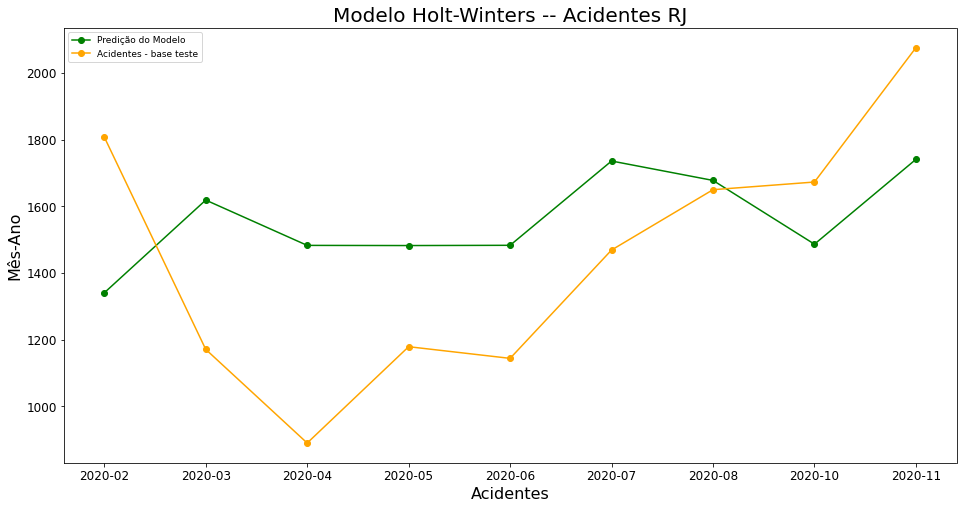

In [219]:
# Plotando os gráficos

plt.figure(figsize=(16,8))
plt.plot(forecast_holtwint_acid, marker = "o", color = "green", label = "Predição do Modelo")
plt.plot(acid_teste, marker="o", color = "orange", label="Acidentes - base teste")
plt.xlabel("Acidentes", fontsize = 16)
plt.ylabel("Mês-Ano", fontsize = 16)
plt.title("Modelo Holt-Winters -- Acidentes RJ", fontsize = 20)
plt.rcParams.update({'font.size': 12})
plt.legend(fontsize=9)
plt.show()

### INFRAÇÕES

In [220]:
# Aplicando modelo Holt-Winters - Infrações

holtwint_infra = ExponentialSmoothing(infra_treino, seasonal_periods=12, trend="add", seasonal='add', use_boxcox=True, initialization_method="estimated")
holtwint_infra_ajustado = holtwint_infra.fit(optimized = True)

C:\Users\Camila\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Camila\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [221]:
holtwint_infra_ajustado.summary()

Dep. Variable:,None,No. Observations:,38
Model:,ExponentialSmoothing,SSE,14531222699.503
Optimized:,True,AIC,782.955
Trend:,Additive,BIC,809.157
Seasonal:,Additive,AICC,818.955
Seasonal Periods:,12,Date:,"Mon, 18 Oct 2021"
Box-Cox:,True,Time:,17:58:29
Box-Cox Coeff.:,1.76277,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,True
smoothing_trend,0.0250000,beta,True


In [222]:
# Criando Forecast
forecast_holtwint_infra = holtwint_infra_ajustado.forecast(9).rename("Holt Winters Seasonal - Infrações")
forecast_holtwint_infra = forecast_holtwint_infra.set_axis(['2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'])

C:\Users\Camila\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [223]:
infra_teste

mes_ano
2020-04    51356
2020-05    63910
2020-06    76894
2020-07    77965
2020-08    84954
2020-09    64407
2020-10    79474
2020-11    95194
2020-12    89747
dtype: int64

In [224]:
forecast_holtwint_infra

2020-04     74144.926035
2020-05     50924.683858
2020-06     76093.362368
2020-07     78766.533737
2020-08     50349.256360
2020-09     62976.585470
2020-10     97872.752398
2020-11     90978.227867
2020-12    101743.545457
Name: Holt Winters Seasonal - Infrações, dtype: float64

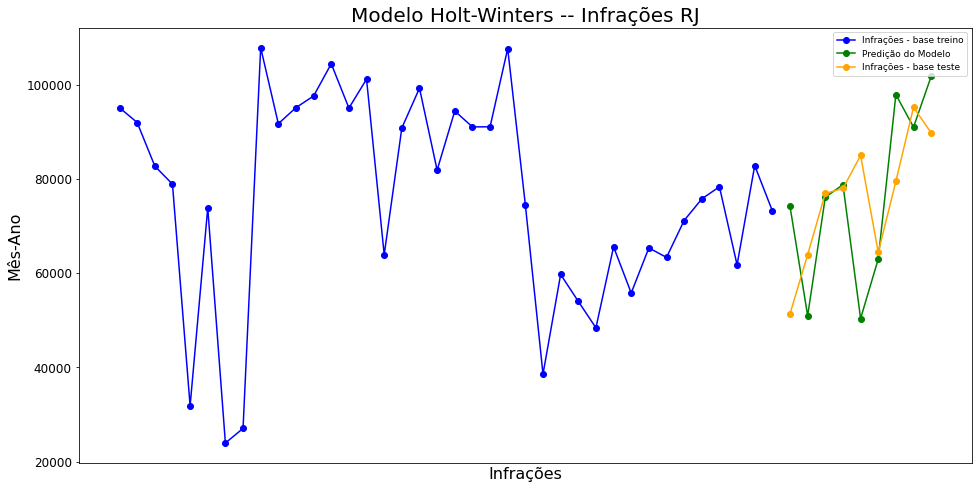

In [225]:
# Plotando os gráficos

plt.figure(figsize=(16,8))
plt.plot(infra_treino, marker="o", color = 'blue', label="Infrações - base treino")
plt.plot(forecast_holtwint_infra, marker = "o", color = "green", label = "Predição do Modelo")
plt.plot(infra_teste, marker="o", color = "orange", label="Infrações - base teste")
plt.xlabel("Infrações", fontsize = 16)
plt.ylabel("Mês-Ano", fontsize = 16)
plt.title("Modelo Holt-Winters -- Infrações RJ", fontsize = 20)
plt.rcParams.update({'font.size': 12})
plt.legend(fontsize=9)
plt.xticks([])
plt.show()

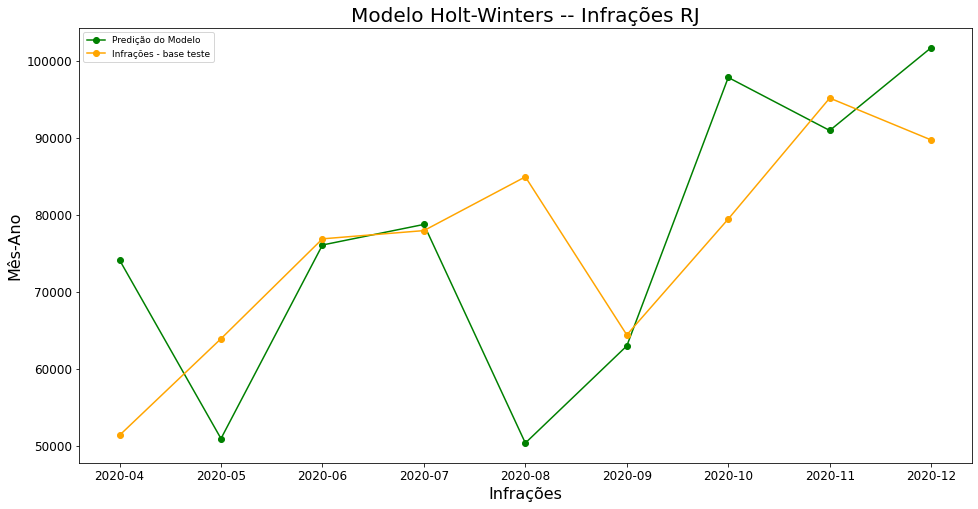

In [226]:
# Plotando os gráficos

plt.figure(figsize=(16,8))
plt.plot(forecast_holtwint_infra, marker = "o", color = "green", label = "Predição do Modelo")
plt.plot(infra_teste, marker="o", color = "orange", label="Infrações - base teste")
plt.xlabel("Infrações", fontsize = 16)
plt.ylabel("Mês-Ano", fontsize = 16)
plt.title("Modelo Holt-Winters -- Infrações RJ", fontsize = 20)
plt.rcParams.update({'font.size': 12})
plt.legend(fontsize=9)
plt.show()

In [ ]:
# dESEMPENHO

In [263]:
# HW - ACIDENTES
print("MSE - HW ACIDENTES")
mean_forecast_error_acidhw = mean_squared_error(forecast_holtwint_acid, acid_teste)
print(mean_forecast_error_acidhw)
# HW - INFRAÇÕES
print("MSE - HW INFRAÇÕES")
mean_forecast_error_infrahw = mean_squared_error(forecast_holtwint_infra, infra_teste)
print(mean_forecast_error_infrahw)

MSE - HW ACIDENTES
132967.51961682294
MSE - HW INFRAÇÕES
265441706.4007413


# #################################################################
# Holt Linear Trend

## Acidentes

In [227]:
# Criando o Modelo
holtlin_acid = Holt(acid_treino, initialization_method="estimated")
holtlin_acid_ajustado = holtlin_acid.fit(smoothing_level=0.2, smoothing_trend=0.2, optimized=True)

C:\Users\Camila\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [228]:
holtlin_acid_ajustado.summary()

Dep. Variable:,None,No. Observations:,37
Model:,Holt,SSE,1641707.760
Optimized:,True,AIC,403.912
Trend:,Additive,BIC,410.356
Seasonal:,None,AICC,406.712
Seasonal Periods:,None,Date:,"Mon, 18 Oct 2021"
Box-Cox:,False,Time:,17:58:40
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2000000,alpha,False
smoothing_trend,0.2000000,beta,False


In [229]:
# Criando o forecast
forecast_holtlin_acid = holtlin_acid_ajustado.forecast(9).rename("Holt Linear Trend")
forecast_holtlin_acid = forecast_holtlin_acid.set_axis(['2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-10', '2020-11'])

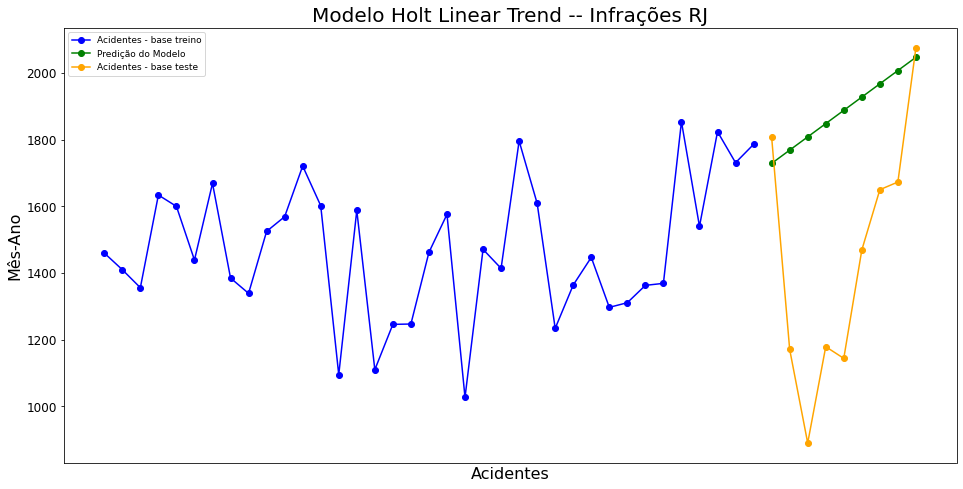

In [230]:
# Plotando os gráficos

plt.figure(figsize=(16,8))
plt.plot(acid_treino, marker="o", color = 'blue', label="Acidentes - base treino")
plt.plot(forecast_holtlin_acid, marker = "o", color = "green", label = "Predição do Modelo")
plt.plot(acid_teste, marker="o", color = "orange", label="Acidentes - base teste")
plt.xlabel("Acidentes", fontsize = 16)
plt.ylabel("Mês-Ano", fontsize = 16)
plt.title("Modelo Holt Linear Trend -- Infrações RJ", fontsize = 20)
plt.rcParams.update({'font.size': 12})
plt.legend(fontsize=9)
plt.xticks([])
plt.show()

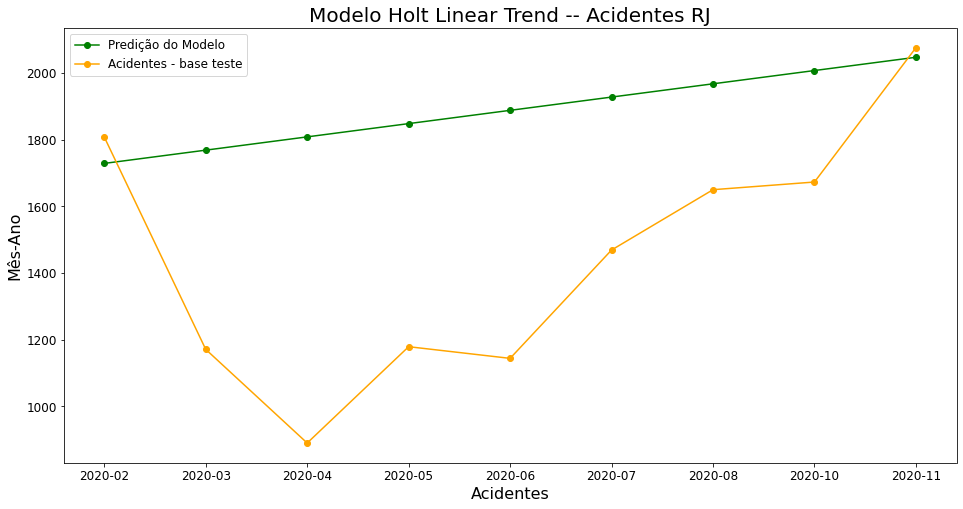

In [231]:
# Plotando os gráficos

plt.figure(figsize=(16,8))
plt.plot(forecast_holtlin_acid, marker = "o", color = "green", label = "Predição do Modelo")
plt.plot(acid_teste, marker="o", color = "orange", label="Acidentes - base teste")
plt.xlabel("Acidentes", fontsize = 16)
plt.ylabel("Mês-Ano", fontsize = 16)
plt.title("Modelo Holt Linear Trend -- Acidentes RJ", fontsize = 20)
plt.rcParams.update({'font.size': 12})
plt.legend(fontsize=12)
plt.show()

## Infrações

In [232]:
# Criando o Modelo
holtlin_infra = Holt(infra_treino, initialization_method="estimated")
holtlin_infra_ajustado = holtlin_infra.fit(smoothing_level=0.2, smoothing_trend=0.2, optimized=True)

C:\Users\Camila\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [233]:
holtlin_infra_ajustado.summary()

Dep. Variable:,None,No. Observations:,38
Model:,Holt,SSE,23010108873.652
Optimized:,True,AIC,776.421
Trend:,Additive,BIC,782.972
Seasonal:,None,AICC,779.131
Seasonal Periods:,None,Date:,"Mon, 18 Oct 2021"
Box-Cox:,False,Time:,17:58:48
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2000000,alpha,False
smoothing_trend,0.2000000,beta,False


In [234]:
# Criando o forecast
forecast_holtlin_infra = holtlin_infra_ajustado.forecast(9).rename("Holt Linear Trend")
forecast_holtlin_infra = forecast_holtlin_infra.set_axis(['2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'])

C:\Users\Camila\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


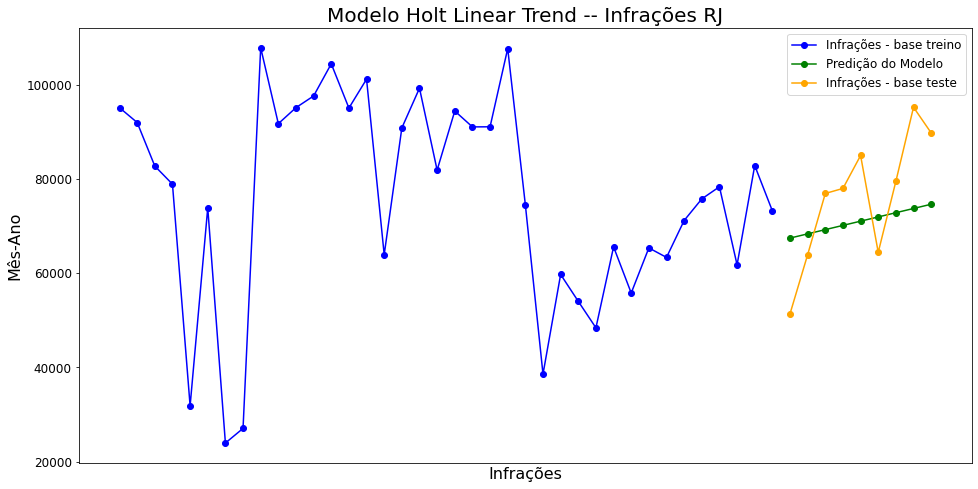

In [235]:
# Plotando os gráficos

plt.figure(figsize=(16,8))
plt.plot(infra_treino, marker="o", color = 'blue', label="Infrações - base treino")
plt.plot(forecast_holtlin_infra, marker = "o", color = "green", label = "Predição do Modelo")
plt.plot(infra_teste, marker="o", color = "orange", label="Infrações - base teste")
plt.xlabel("Infrações", fontsize = 16)
plt.ylabel("Mês-Ano", fontsize = 16)
plt.title("Modelo Holt Linear Trend -- Infrações RJ", fontsize = 20)
plt.rcParams.update({'font.size': 12})
plt.legend(fontsize=12)
plt.xticks([])
plt.show()

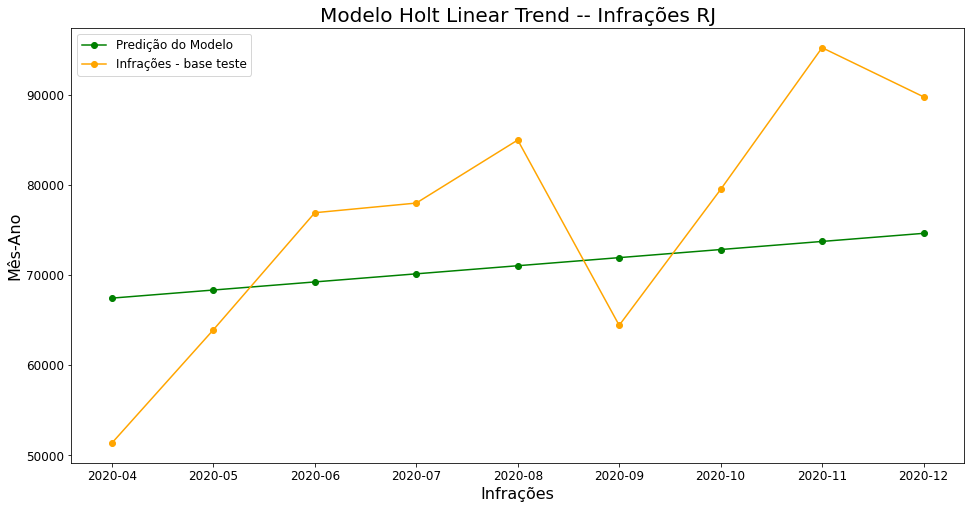

In [236]:
# Plotando os gráficos

plt.figure(figsize=(16,8))
plt.plot(forecast_holtlin_infra, marker = "o", color = "green", label = "Predição do Modelo")
plt.plot(infra_teste, marker="o", color = "orange", label="Infrações - base teste")
plt.xlabel("Infrações", fontsize = 16)
plt.ylabel("Mês-Ano", fontsize = 16)
plt.title("Modelo Holt Linear Trend -- Infrações RJ", fontsize = 20)
plt.rcParams.update({'font.size': 12})
plt.legend(fontsize=12)
plt.show()

In [264]:
# Holt linear trend - ACIDENTES
print("MSE - HLT ACIDENTES")
mean_forecast_error_acidhlt = mean_squared_error(forecast_holtlin_acid, acid_teste)
print(mean_forecast_error_acidhlt)
# Holt Linear Trend - INFRAÇÕES
print("MSE - HLT INFRAÇÕES")
mean_forecast_error_infrahlt = mean_squared_error(forecast_holtlin_infra, infra_teste)
print(mean_forecast_error_infrahlt)

MSE - HLT ACIDENTES
292505.4467597051
MSE - HLT INFRAÇÕES
153766072.67576346


# Desempenho geral Comparativo de Modelos


In [265]:
# Holt linear trend - ACIDENTES
print("MSE - HLT ACIDENTES")
mean_forecast_error_acidhlt = mean_squared_error(forecast_holtlin_acid, acid_teste)
print(mean_forecast_error_acidhlt)
# Holt Linear Trend - INFRAÇÕES
print("MSE - HLT INFRAÇÕES")
mean_forecast_error_infrahlt = mean_squared_error(forecast_holtlin_infra, infra_teste)
print(mean_forecast_error_infrahlt)

# Holt Winters - ACIDENTES
print("MSE - HW ACIDENTES")
mean_forecast_error_acidhw = mean_squared_error(forecast_holtwint_acid, acid_teste)
print(mean_forecast_error_acidhw)
# Holt Winters - INFRAÇÕES
print("MSE - HW INFRAÇÕES")
mean_forecast_error_infrahw = mean_squared_error(forecast_holtwint_infra, infra_teste)
print(mean_forecast_error_infrahw)

# ARIMA - ACIDENTES
print("MSE - ARIMA ACIDENTES")
mean_forecast_error_acidarima = mean_squared_error(forecast_autoarima_acid, acid_teste)
print(mean_forecast_error_acidarima)
# ARIMA - INFRAÇÕES
print("MSE - INFRA INFRAÇÕES")
mean_forecast_error_infraarima = mean_squared_error(forecast_autoarima_infra, infra_teste)
print(mean_forecast_error_infraarima)

MSE - HLT ACIDENTES
292505.4467597051
MSE - HLT INFRAÇÕES
153766072.67576346
MSE - HW ACIDENTES
132967.51961682294
MSE - HW INFRAÇÕES
265441706.4007413
MSE - ARIMA ACIDENTES
130291.6899602305
MSE - INFRA INFRAÇÕES
226442502.26971498
